#Tarea 1: Laboratorio Pre-procesamiento
# Integrantes:
- Guillermo Duarte Aldana
- Gonzalo González Vallette
- Carolina Salazar Solomó



En este laboratorio, se llevará a cabo el preprocesamiento de los datos con el objetivo de desarrollar posteriormente un modelo predictivo que permita identificar a tiempo cuáles clientes son más propensos a fugarse. La entidad financiera en cuestión enfrenta altas tasas de fuga voluntaria. En el mundo real, los datos suelen ser incompletos e inconsistentes, por lo que es esencial preparar los datos antes de ejecutar modelos de análisis. Para comenzar, descargamos las bibliotecas necesarias. Esto debe hacerse la primera vez que ejecutamos estos códigos. Entre estas bibliotecas, se incluyen numpy, que se utiliza para realizar operaciones matemáticas, y scikit-learn, diseñada específicamente para el aprendizaje automático.

In [ ]:
!pip -q install numpy gensim scikit-learn

Después, es necesario importar las bibliotecas con las que vamos a trabajar. Este paso debe realizarse siempre que deseemos ejecutar este código.

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import pandas.util.testing as tm
import matplotlib.pyplot as plt
import seaborn as sn
from pandas.api.types import is_numeric_dtype
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, KBinsDiscretizer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_selection import SelectKBest, f_classif
np.set_printoptions(suppress=True)

#Subir un archivo de Google Drive

El siguiente paso implica montar Google Drive para poder vincular nuestra base de datos. De esta manera, podremos cargar posteriormente nuestro archivo Base_Fuga_2023_2.xlsx. Asegúrese de que este archivo se encuentre en una carpeta llamada 'Colab Notebooks' en su Drive y que esté claramente identificado.
**Cuando corra la siguiente línea, siga las intrucciones indicando la cuenta de Google correspondiente y aceptando las condiciones.**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Una vez cargado nuestro drive, llamamos a nuestra base de datos:

In [ ]:
ruta_data_set = 'gdrive/My Drive/Colab Notebooks/Base_Fuga_2023_2.xlsx'
data_set = pd.read_excel(ruta_data_set)

Descripción de variables de la base de datos: (Nombre variable, tipo, pequeña descripción)

1.   CreditMes_T, Numérica, Crédito en mes T
2.   CreditMes_T-1, Numérica, Crédito en mes T-1
3.   CreditMes_T-2, Numérica, Crédito en mes T-2
4.   NumTarjCred_T, Numérica, Número de tarjetas de crédito en mes T
5.   NumTarjCred_T-1, Numérica, Número de tarjetas de crédito en mes T-1
6.   NumTarjCred_T-2, Numérica, Número de tarjetas de crédito en mes T-2
7.   Ingreso, Numérica, Ingreso del cliente
8.   Edad, Numérica, Edad del cliente en años
9.   NumTransWeb_T, Numérica, Número de transacciones en web en mes T
10.  NumTransWeb_T-1, Numérica, Número de transacciones en web en mes T-1
11.  NumTransWeb_T-2, Numérica, Número de transacciones en web en mes T-2
12.  MargenComp_T, Numérica, Margen del cliente para la compañía en mes T
13.  MargenComp_T-1, Numérica, Margen del cliente para la compañía en mes T-1
14.  MargenComp_T-2, Numérica, Margen del cliente para la compañía en mes T-2
15.  MargenComp_T-3, Numérica, Margen del cliente para la compañía en mes T-3
16.   MargenComp_T-4, Numérica, Margen del cliente para la compañía en mes T-4
17.  MargenComp_T-5, Numérica, Margen del cliente para la compañía en mes T-5
18.  MargenComp_T-6, Numérica, Margen del cliente para la compañía en mes T-6
19.  Telefono, Categórica nominal, Si se tiene o no el número de teléfono del cliente
20.  NivelEduc, Categórica ordinal, Nivel Educacional del cliente
21.  Genero, Categórica nominal, Género del cliente
22.  EstCivil, Categórica nominal, Estado civil del cliente
23.  Region, Categórica nominal, Región donde vive el cliente
24.  FUGA, Categórica nominal, Variable objetivo




# Análisis Exploratorio de Datos

Consiste en un examen preliminar de los datos por medio de la aplicación de técnicas de estadística clásica (estadística frecuentista, gráficos, estadísticos muestrales, etc.) con el fin de encontrar patrones y tendencias subyacentes dentro de las variables, pero también para encontrar problemas en la base de datos (missing values, inconsistencias, errores, etc.) para luego realizar su adaptación en las etapas posteriores. Esto se hace con el fin de evitar que la información generada presente inconsistencias o errores.

## Estadística descriptiva

Para analizar el comportamiento de los datos de las variables numéricas, obtenemos la media, desviación estandar, mínimo, máximo y cuartiles. Mientras que para las variables categóricas obtenemos la cantidad de categorías de la variable (unique), la moda (top) y la frecuencia de de la moda (freq).

In [ ]:
data_set.describe(include='all').round(1)

,CreditMes_T,CreditMes_T-1,CreditMes_T-2,NumTarjCred_T,NumTarjCred_T-1,NumTarjCred_T-2,Ingreso,Edad,NumTransWeb_T,NumTransWeb_T-1,...,MargenComp_T-3,MargenComp_T-4,MargenComp_T-5,MargenComp_T-6,Telefono,NivelEduc,Genero,EstCivil,Region,FUGA
count,5603.0,5605.0,5605.0,5598.0,5603.0,5605.0,5605.0,5605.0,5603.0,5603.0,...,5605.0,5603.0,5604.0,5605.0,5605,5602,5605,5603,5605,5605
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,4,3,4,1,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,SI,UNI,M,CAS,RM,NF
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5605,3627,3895,2960,5605,4889
mean,1021484.8,632812.1,583796.3,0.8,0.8,0.8,1223802.4,35.9,5.2,3.9,...,253053.6,253046.6,260956.4,195991.5,NaN,NaN,NaN,NaN,NaN,NaN
std,115216.5,127733.6,80016.5,0.7,0.7,0.7,562272.8,9.2,11.3,8.5,...,2472.4,2546.6,1653.4,3001.6,NaN,NaN,NaN,NaN,NaN,NaN
min,912650.0,500000.0,500000.0,0.0,0.0,0.0,-975950.0,15.0,0.0,0.0,...,100000.0,157840.0,183560.0,137500.0,NaN,NaN,NaN,NaN,NaN,NaN
25%,990500.0,597200.0,562100.0,0.0,0.0,0.0,890450.0,29.0,0.0,0.0,...,252840.0,252960.0,260800.0,195380.0,NaN,NaN,NaN,NaN,NaN,NaN
50%,997700.0,604850.0,566150.0,1.0,1.0,1.0,1057650.0,33.0,0.0,1.0,...,252960.0,253040.0,260880.0,195640.0,NaN,NaN,NaN,NaN,NaN,NaN
75%,1014800.0,623300.0,577400.0,1.0,1.0,1.0,1362600.0,41.0,6.0,5.0,...,253260.0,253320.0,261100.0,196420.0,NaN,NaN,NaN,NaN,NaN,NaN


De la tabla anterior, podemos identificar valores perdidos (gracias a la fila *count*) e inconsistencias (gracias a las filas *min* y *max*).


Podemos diferenciar entre variables categoricas y numéricas como se muestra a continuación:


Variables categoricas:

In [ ]:
categoricas = ['Telefono', 'NivelEduc', 'Genero', 'EstCivil', 'Region', 'FUGA']

In [ ]:
data_set.describe(exclude=[np.number]).round(1)

,Telefono,NivelEduc,Genero,EstCivil,Region,FUGA
count,5605,5602,5605,5603,5605,5605
unique,1,4,3,4,1,2
top,SI,UNI,M,CAS,RM,NF
freq,5605,3627,3895,2960,5605,4889


Variables numéricas:

In [ ]:
data_set.describe(include=[np.number]).round(1)

,CreditMes_T,CreditMes_T-1,CreditMes_T-2,NumTarjCred_T,NumTarjCred_T-1,NumTarjCred_T-2,Ingreso,Edad,NumTransWeb_T,NumTransWeb_T-1,NumTransWeb_T-2,MargenComp_T,MargenComp_T-1,MargenComp_T-2,MargenComp_T-3,MargenComp_T-4,MargenComp_T-5,MargenComp_T-6
count,5603.0,5605.0,5605.0,5598.0,5603.0,5605.0,5605.0,5605.0,5603.0,5603.0,5605.0,5603.0,5604.0,5605.0,5605.0,5603.0,5604.0,5605.0
mean,1021484.8,632812.1,583796.3,0.8,0.8,0.8,1223802.4,35.9,5.2,3.9,4.8,174585.8,227227.7,226217.6,253053.6,253046.6,260956.4,195991.5
std,115216.5,127733.6,80016.5,0.7,0.7,0.7,562272.8,9.2,11.3,8.5,10.2,2037.1,2409.9,1967.2,2472.4,2546.6,1653.4,3001.6
min,912650.0,500000.0,500000.0,0.0,0.0,0.0,-975950.0,15.0,0.0,0.0,0.0,152560.0,173520.0,169020.0,100000.0,157840.0,183560.0,137500.0
25%,990500.0,597200.0,562100.0,0.0,0.0,0.0,890450.0,29.0,0.0,0.0,0.0,174300.0,227040.0,226000.0,252840.0,252960.0,260800.0,195380.0
50%,997700.0,604850.0,566150.0,1.0,1.0,1.0,1057650.0,33.0,0.0,1.0,1.0,174460.0,227160.0,226100.0,252960.0,253040.0,260880.0,195640.0
75%,1014800.0,623300.0,577400.0,1.0,1.0,1.0,1362600.0,41.0,6.0,5.0,5.0,174820.0,227400.0,226400.0,253260.0,253320.0,261100.0,196420.0
max,5000000.0,5000000.0,3498350.0,9.0,9.0,9.0,9628550.0,131.0,142.0,159.0,161.0,300000.0,300000.0,281160.0,300000.0,273820.0,300000.0,287480.0


Separando por grupos de variables:

Créditos por mes:

In [ ]:
Credit=['CreditMes_T', 'CreditMes_T-1', 'CreditMes_T-2']
data_set[Credit].describe(include='all').round(1)

,CreditMes_T,CreditMes_T-1,CreditMes_T-2
count,5603.0,5605.0,5605.0
mean,1021484.8,632812.1,583796.3
std,115216.5,127733.6,80016.5
min,912650.0,500000.0,500000.0
25%,990500.0,597200.0,562100.0
50%,997700.0,604850.0,566150.0
75%,1014800.0,623300.0,577400.0
max,5000000.0,5000000.0,3498350.0


Número de tarjetas de crédito:

In [ ]:
NumTarj=['NumTarjCred_T', 'NumTarjCred_T-1', 'NumTarjCred_T-2']
data_set[NumTarj].describe(include='all').round(1)

,NumTarjCred_T,NumTarjCred_T-1,NumTarjCred_T-2
count,5598.0,5603.0,5605.0
mean,0.8,0.8,0.8
std,0.7,0.7,0.7
min,0.0,0.0,0.0
25%,0.0,0.0,0.0
50%,1.0,1.0,1.0
75%,1.0,1.0,1.0
max,9.0,9.0,9.0


Número de transferencias por mes:

In [ ]:
NumTrans=['NumTransWeb_T', 'NumTransWeb_T-1', 'NumTransWeb_T-2']
data_set[NumTrans].describe(include='all').round(1)

,NumTransWeb_T,NumTransWeb_T-1,NumTransWeb_T-2
count,5603.0,5603.0,5605.0
mean,5.2,3.9,4.8
std,11.3,8.5,10.2
min,0.0,0.0,0.0
25%,0.0,0.0,0.0
50%,0.0,1.0,1.0
75%,6.0,5.0,5.0
max,142.0,159.0,161.0


Margen del cliente para la compañia:

In [ ]:
Margen=['MargenComp_T', 'MargenComp_T-1', 'MargenComp_T-2', 'MargenComp_T-3', 'MargenComp_T-4', 'MargenComp_T-5', 'MargenComp_T-6']
data_set[Margen].describe(include='all').round(1)

,MargenComp_T,MargenComp_T-1,MargenComp_T-2,MargenComp_T-3,MargenComp_T-4,MargenComp_T-5,MargenComp_T-6
count,5603.0,5604.0,5605.0,5605.0,5603.0,5604.0,5605.0
mean,174585.8,227227.7,226217.6,253053.6,253046.6,260956.4,195991.5
std,2037.1,2409.9,1967.2,2472.4,2546.6,1653.4,3001.6
min,152560.0,173520.0,169020.0,100000.0,157840.0,183560.0,137500.0
25%,174300.0,227040.0,226000.0,252840.0,252960.0,260800.0,195380.0
50%,174460.0,227160.0,226100.0,252960.0,253040.0,260880.0,195640.0
75%,174820.0,227400.0,226400.0,253260.0,253320.0,261100.0,196420.0
max,300000.0,300000.0,281160.0,300000.0,273820.0,300000.0,287480.0


Ingreso y Edad:

In [ ]:
cols=['Ingreso', 'Edad']
data_set[cols].describe(include='all').round(1)

,Ingreso,Edad
count,5605.0,5605.0
mean,1223802.4,35.9
std,562272.8,9.2
min,-975950.0,15.0
25%,890450.0,29.0
50%,1057650.0,33.0
75%,1362600.0,41.0
max,9628550.0,131.0


Como primera observación, se puede identificar la existencia de datos faltantes o valores perdidos entre las variables. Observando la tabla 1, la variable NivelEduc presenta 5602 observaciones, mientras que la variable Genero presenta 5605 observaciones. Esta situación se repite en otras variables.

En segundo lugar, existen inconsistencias con el número de categorías en las variables, ya que por ejemplo, se puede ver que el número de categorías en Genero son 3 y no 2.

En tercer lugar, existen inconsistencias con los valores de las variables. Podemos ver en la tabla 6 que el máximo valor que toma la variable Edad es de 131 años, lo cual es imposible ya que hasta la actualidad no ha existido una persona que viva más de 123 años (https://eltiempolatino.com/2023/03/08/cultura/quienes-han-sido-las-ultimas-personas-mas-viejas-del-mundo-una-pista-todas-son-mujeres/ ). También llama la atención que exista un cliente de 15 años de edad y que el mínimo valor de la variable Ingreso sea -975950.

También podemos tener una previsualización de los datos de cada variable, como se muestra a continuación:

In [ ]:
print(data_set)

      CreditMes_T  CreditMes_T-1  CreditMes_T-2  NumTarjCred_T  \
0       1031900.0         666500         608000            2.0   
1       1078700.0         634100         583250            0.0   
2       1076000.0         708800         621950            1.0   
3        995450.0         599900         564350            1.0   
4       1052150.0         609800         572450            1.0   
...           ...            ...            ...            ...   
5600     989600.0         596300         561650            0.0   
5601     990050.0         597200         562100            1.0   
5602     990050.0         596750         562100            0.0   
5603     990500.0         596750         562100            0.0   
5604     990500.0         597200         562100            2.0   

      NumTarjCred_T-1  NumTarjCred_T-2  Ingreso  Edad  NumTransWeb_T  \
0                 2.0                2  1050050    30            1.0   
1                 0.0                0   830600    38          

Separando por grupos de variables:

In [ ]:
print(data_set[categoricas])

     Telefono NivelEduc Genero EstCivil Region FUGA
0          SI       UNI      M      SOL     RM   NF
1          SI       TEC      F      CAS     RM   NF
2          SI       UNI      F      SOL     RM   NF
3          SI       TEC      M      CAS     RM   NF
4          SI       MED      F      SOL     RM   NF
...       ...       ...    ...      ...    ...  ...
5600       SI       UNI      F      SOL     RM    F
5601       SI       UNI      M      SOL     RM    F
5602       SI       TEC      M      CAS     RM    F
5603       SI       UNI      F      VIU     RM    F
5604       SI       UNI      M      SOL     RM    F

[5605 rows x 6 columns]


In [ ]:
print(data_set[Credit])

      CreditMes_T  CreditMes_T-1  CreditMes_T-2
0       1031900.0         666500         608000
1       1078700.0         634100         583250
2       1076000.0         708800         621950
3        995450.0         599900         564350
4       1052150.0         609800         572450
...           ...            ...            ...
5600     989600.0         596300         561650
5601     990050.0         597200         562100
5602     990050.0         596750         562100
5603     990500.0         596750         562100
5604     990500.0         597200         562100

[5605 rows x 3 columns]


In [ ]:
print(data_set[NumTarj])

      NumTarjCred_T  NumTarjCred_T-1  NumTarjCred_T-2
0               2.0              2.0                2
1               0.0              0.0                0
2               1.0              1.0                1
3               1.0              1.0                1
4               1.0              1.0                1
...             ...              ...              ...
5600            0.0              0.0                0
5601            1.0              1.0                1
5602            0.0              0.0                0
5603            0.0              0.0                0
5604            2.0              0.0                0

[5605 rows x 3 columns]


In [ ]:
print(data_set[NumTrans])

      NumTransWeb_T  NumTransWeb_T-1  NumTransWeb_T-2
0               1.0              0.0                0
1               0.0              0.0                2
2               0.0              0.0                0
3               0.0              0.0                0
4               6.0              3.0                9
...             ...              ...              ...
5600            0.0              0.0                0
5601           15.0              1.0                0
5602            0.0              0.0                4
5603            0.0              0.0                0
5604            0.0              0.0                0

[5605 rows x 3 columns]


In [ ]:
print(data_set[Margen])

      MargenComp_T  MargenComp_T-1  MargenComp_T-2  MargenComp_T-3  \
0         174160.0        227040.0          225880          252700   
1         174260.0        227140.0          225880          252800   
2         173580.0        227620.0          222980          252840   
3         174580.0        227360.0          226300          253160   
4         174560.0        227320.0          226200          253140   
...            ...             ...             ...             ...   
5600      174300.0        227040.0          226000          252840   
5601      175060.0        227240.0          226660          253520   
5602      174340.0        227020.0          226040          252860   
5603      174940.0        300000.0          169020          249980   
5604      174300.0        227040.0          226000          252840   

      MargenComp_T-4  MargenComp_T-5  MargenComp_T-6  
0           252800.0        260700.0          195120  
1           252860.0        260780.0          196

In [ ]:
print(data_set[cols])

      Ingreso  Edad
0     1050050    30
1      830600    38
2      980700    25
3     1178300    46
4      868600    55
...       ...   ...
5600   972150    26
5601   992100    33
5602   851500    30
5603  3693900    58
5604   866700    20

[5605 rows x 2 columns]


Una forma más cómoda de visualizar valores perdidos es la siguiente:

In [ ]:
data_set.isnull().sum()

CreditMes_T        2
CreditMes_T-1      0
CreditMes_T-2      0
NumTarjCred_T      7
NumTarjCred_T-1    2
NumTarjCred_T-2    0
Ingreso            0
Edad               0
NumTransWeb_T      2
NumTransWeb_T-1    2
NumTransWeb_T-2    0
MargenComp_T       2
MargenComp_T-1     1
MargenComp_T-2     0
MargenComp_T-3     0
MargenComp_T-4     2
MargenComp_T-5     1
MargenComp_T-6     0
Telefono           0
NivelEduc          3
Genero             0
EstCivil           2
Region             0
FUGA               0
dtype: int64

## Gráficos y Análisis

Los gráficos nos permiten identificar patrones univariados y bivariados, visualizar los datos y valores atípicos.

Veamos primero el *Gráfico de frecuencias* estándar para la variable edad:

### Análisis Univariado

En esta sección entregaremos una visualización de las variables iniciales presentes en la base de datos llamada Base_Fuga_2023_2. Se emplean varios gráficos con diferentes técnicas y herramientas para, al finalizar cada grupo de variables, entregar un análisis y observaciones pertinentes.

#### CreditMes_T / CreditMes_T-1 / CreditMes_T-2

A continuación se presentan los graficos asociados a las variables CreditMes_T, CreditMes_T-1, CreditMes_T-2.

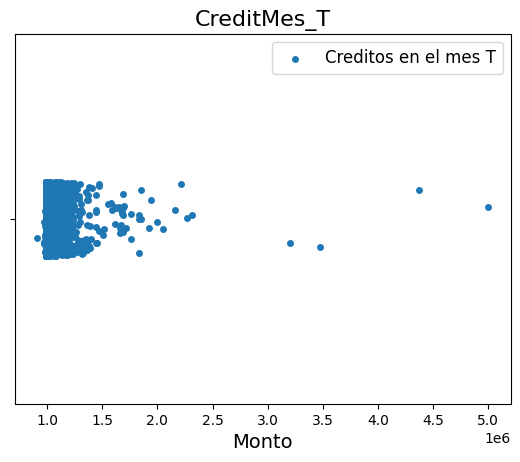

In [ ]:
a1= sn.stripplot(x='CreditMes_T', data=data_set)
a1.set_title('CreditMes_T', fontsize = 16)
a1.set_xlabel('Monto', fontsize = 14)
a1.legend(['Creditos en el mes T'], fontsize = 12)
plt.show()

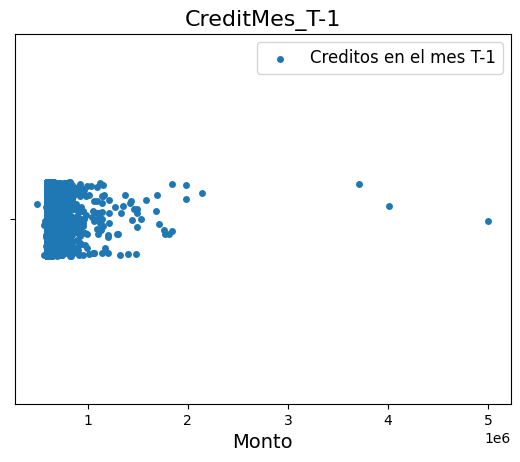

In [ ]:
a2= sn.stripplot(x='CreditMes_T-1', data=data_set)
a2.set_title('CreditMes_T-1', fontsize = 16)
a2.set_xlabel('Monto', fontsize = 14)
a2.legend(['Creditos en el mes T-1'], fontsize = 12)
plt.show()

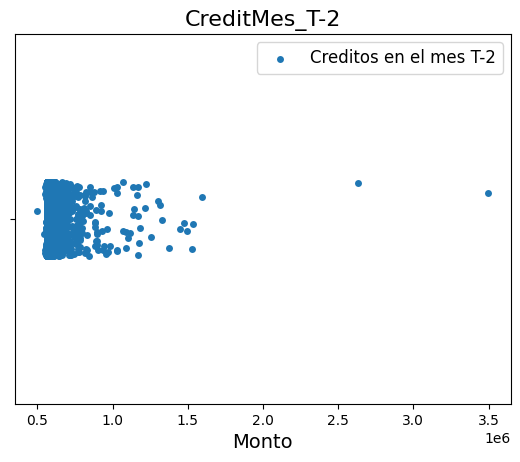

In [ ]:
a3= sn.stripplot(x='CreditMes_T-2', data=data_set)
a3.set_title('CreditMes_T-2', fontsize = 16)
a3.set_xlabel('Monto', fontsize = 14)
a3.legend(['Creditos en el mes T-2'], fontsize = 12)
plt.show()

#### CreditMes_T en extensión

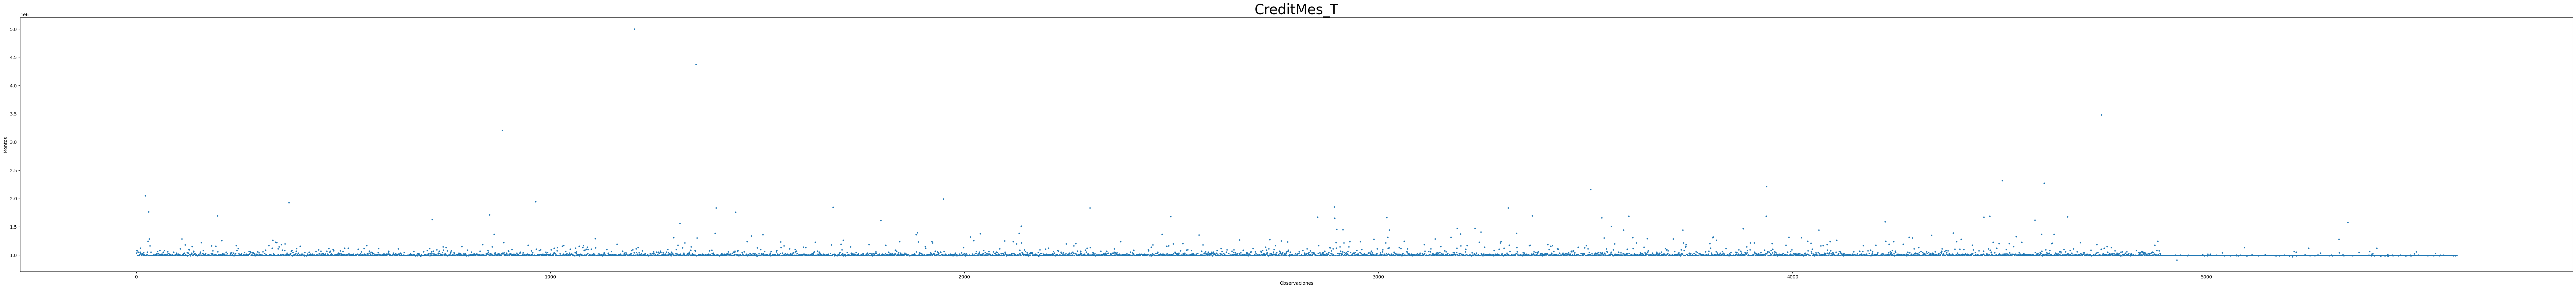

In [ ]:
x = list(range(len(data_set["CreditMes_T"])))
plt.figure(figsize=(100,10))
plt.scatter(x, data_set['CreditMes_T'], s = 5)
plt.xlabel("Observaciones")
plt.ylabel("Montos")
plt.title('CreditMes_T', fontsize = 30)
plt.show()

#### CreditMes_T-1 en extensión

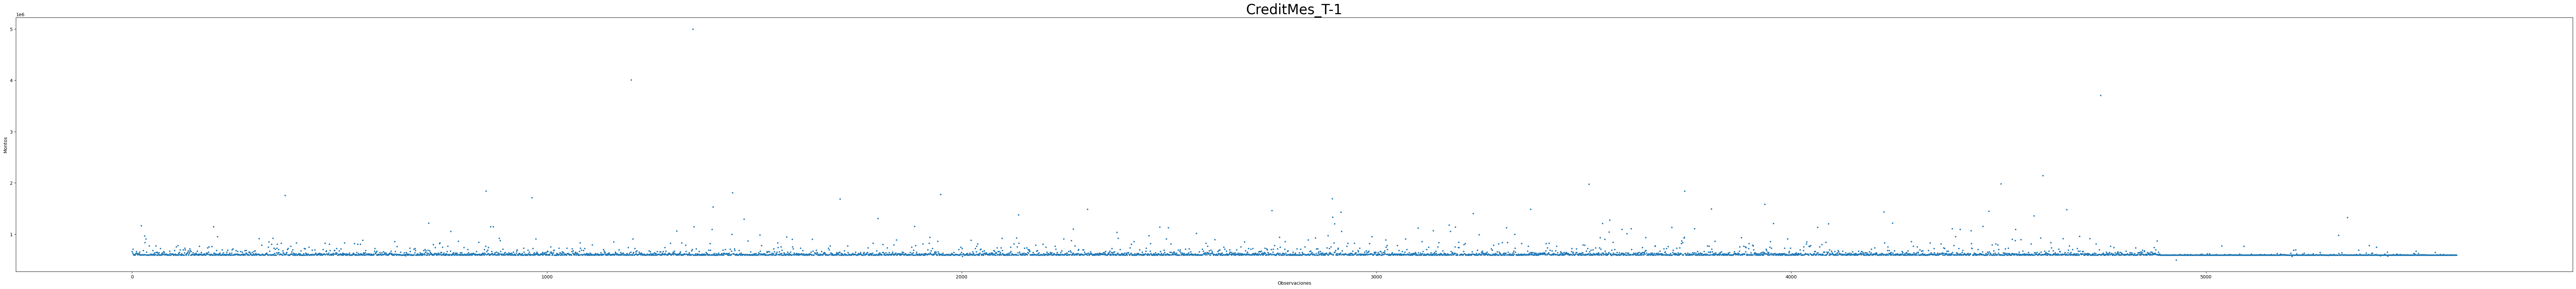

In [ ]:
x = list(range(len(data_set["CreditMes_T-1"])))
plt.figure(figsize=(100,10))
plt.scatter(x, data_set['CreditMes_T-1'], s = 5)
plt.xlabel("Observaciones")
plt.ylabel("Montos")
plt.title('CreditMes_T-1', fontsize = 30)
plt.show()

#### CreditMes_T-2 en extensión

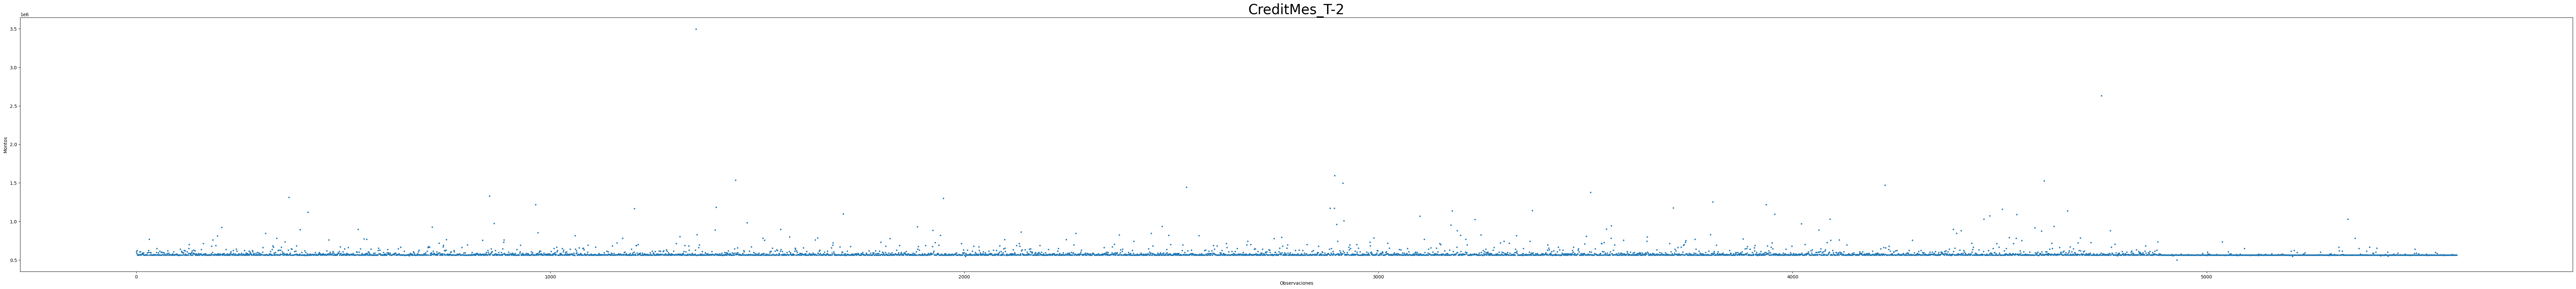

In [ ]:
x = list(range(len(data_set["CreditMes_T-2"])))
plt.figure(figsize=(100,10))
plt.scatter(x, data_set['CreditMes_T-2'], s = 5)
plt.xlabel("Observaciones")
plt.ylabel("Montos")
plt.title('CreditMes_T-2', fontsize = 30)
plt.show()

#### CreditMes_T / CreditMes_T-1 CreditMes_T-2 comparados con las primeras 100, 1000 y el total de observaciones





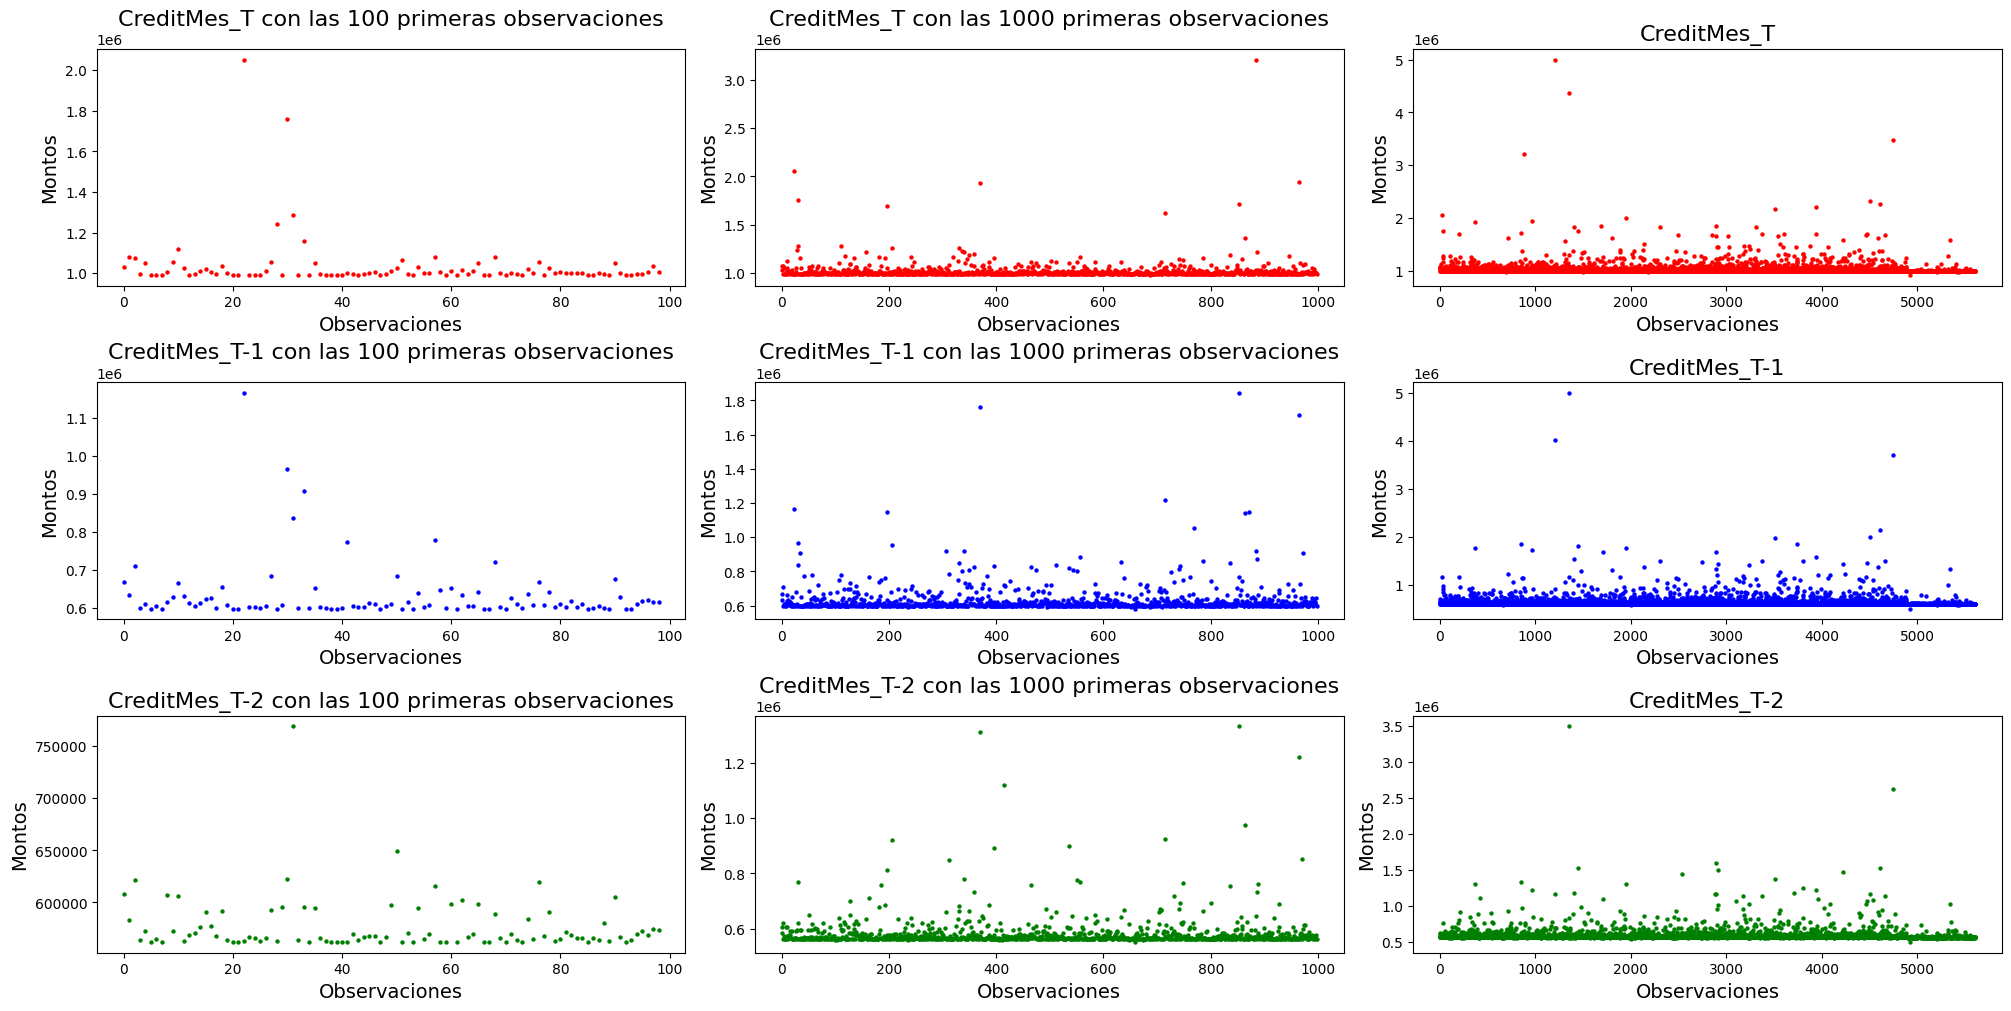

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=3, layout='constrained', figsize=(20, 10))

x = list(range(0,99))
y = list(range(0,999))
z = list(range(0,5605))

axs[0, 0].scatter(x, data_set['CreditMes_T'][:99], color ="red", linewidth=0, s = 10)
axs[0, 0].set_title('CreditMes_T con las 100 primeras observaciones', fontsize = 16)
axs[0, 0].set_xlabel('Observaciones', fontsize = 14)
axs[0, 0].set_ylabel('Montos', fontsize = 14)
axs[0, 1].scatter(y, data_set['CreditMes_T'][:999], color ="red", linewidth=0, s = 10)
axs[0, 1].set_title('CreditMes_T con las 1000 primeras observaciones', fontsize = 16)
axs[0, 1].set_xlabel('Observaciones', fontsize = 14)
axs[0, 1].set_ylabel('Montos', fontsize = 14)
axs[0, 2].scatter(z, data_set['CreditMes_T'], color ="red", linewidth=0, s = 10)
axs[0, 2].set_title('CreditMes_T', fontsize = 16)
axs[0, 2].set_xlabel('Observaciones', fontsize = 14)
axs[0, 2].set_ylabel('Montos', fontsize = 14)
axs[1, 0].scatter(x, data_set['CreditMes_T-1'][:99], color ="blue", linewidth=0, s = 10)
axs[1, 0].set_title('CreditMes_T-1 con las 100 primeras observaciones', fontsize = 16)
axs[1, 0].set_xlabel('Observaciones', fontsize = 14)
axs[1, 0].set_ylabel('Montos', fontsize = 14)
axs[1, 1].scatter(y, data_set['CreditMes_T-1'][:999], color ="blue", linewidth=0, s = 10)
axs[1, 1].set_title('CreditMes_T-1 con las 1000 primeras observaciones', fontsize = 16)
axs[1, 1].set_xlabel('Observaciones', fontsize = 14)
axs[1, 1].set_ylabel('Montos', fontsize = 14)
axs[1, 2].scatter(z, data_set['CreditMes_T-1'], color ="blue", linewidth=0, s = 10)
axs[1, 2].set_title('CreditMes_T-1', fontsize = 16)
axs[1, 2].set_xlabel('Observaciones', fontsize = 14)
axs[1, 2].set_ylabel('Montos', fontsize = 14)
axs[2, 0].scatter(x, data_set['CreditMes_T-2'][:99], color ="green", linewidth=0, s = 10)
axs[2, 0].set_title('CreditMes_T-2 con las 100 primeras observaciones', fontsize = 16)
axs[2, 0].set_xlabel('Observaciones', fontsize = 14)
axs[2, 0].set_ylabel('Montos', fontsize = 14)
axs[2, 1].scatter(y, data_set['CreditMes_T-2'][:999], color ="green", linewidth=0, s = 10)
axs[2, 1].set_title('CreditMes_T-2 con las 1000 primeras observaciones', fontsize = 16)
axs[2, 1].set_xlabel('Observaciones', fontsize = 14)
axs[2, 1].set_ylabel('Montos', fontsize = 14)
axs[2, 2].scatter(z, data_set['CreditMes_T-2'], color ="green", linewidth=0, s = 10)
axs[2, 2].set_title('CreditMes_T-2', fontsize = 16)
axs[2, 2].set_xlabel('Observaciones', fontsize = 14)
axs[2, 2].set_ylabel('Montos', fontsize = 14)

plt.show()

####Conclusiones sobre las variables CreditMes_T, CreditMes_T-1, CreditMes_T-2

#Aquí

Se puede ver que

#### NumTarjCred_T / NumTarjCred_T-1 / NumTarjCred_T-2

A continuación se presentan los graficos asociados a las variables NumTarjCred_T, NumTarjCred_T-1, NumTarjCred_T-2

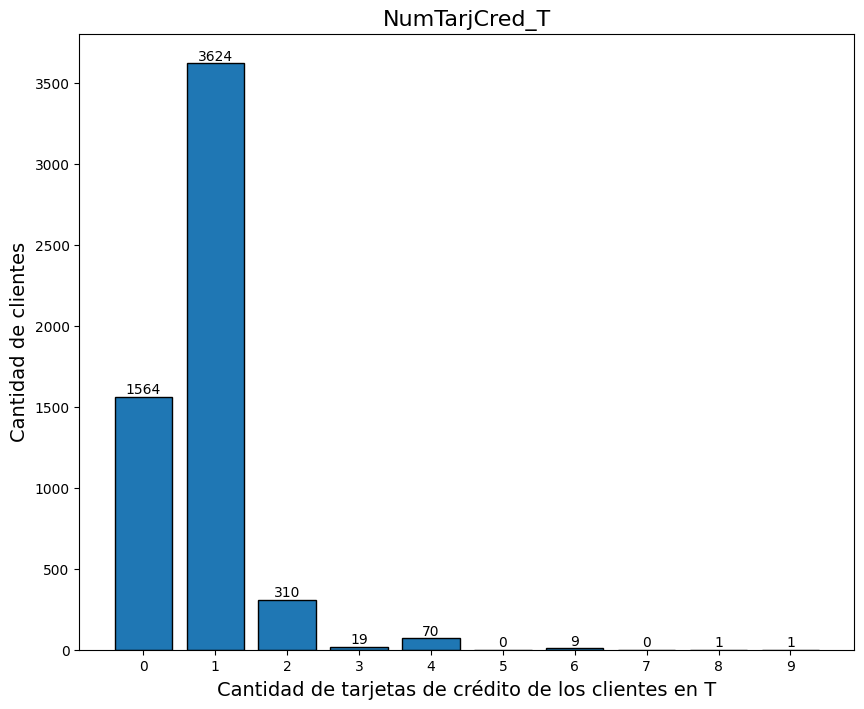

In [ ]:
# Se cuenta la frecuencia en cada categoria de la variable NumTarjCred_T
fNTCT = data_set['NumTarjCred_T'].value_counts()

# Asignación de valor 0 para las categorias no presentes en la vaiable
categorias = list(range(10))
fNTCT = fNTCT.reindex(categorias, fill_value=0)

# Gráfico
plt.figure(figsize=(10,8))
plt.bar(fNTCT.index, fNTCT.values, edgecolor="black")

# Título y nombre de ejes
plt.xlabel('Cantidad de tarjetas de crédito de los clientes en T', fontsize = 14)
plt.ylabel('Cantidad de clientes', fontsize = 14)
plt.title('NumTarjCred_T', fontsize = 16)
plt.xticks(fNTCT.index)  # Asegura que todos los valores únicos aparezcan en el eje x

# Cantidad de observaciones por categoría
for i, v in enumerate(fNTCT.values):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=10)

plt.show()


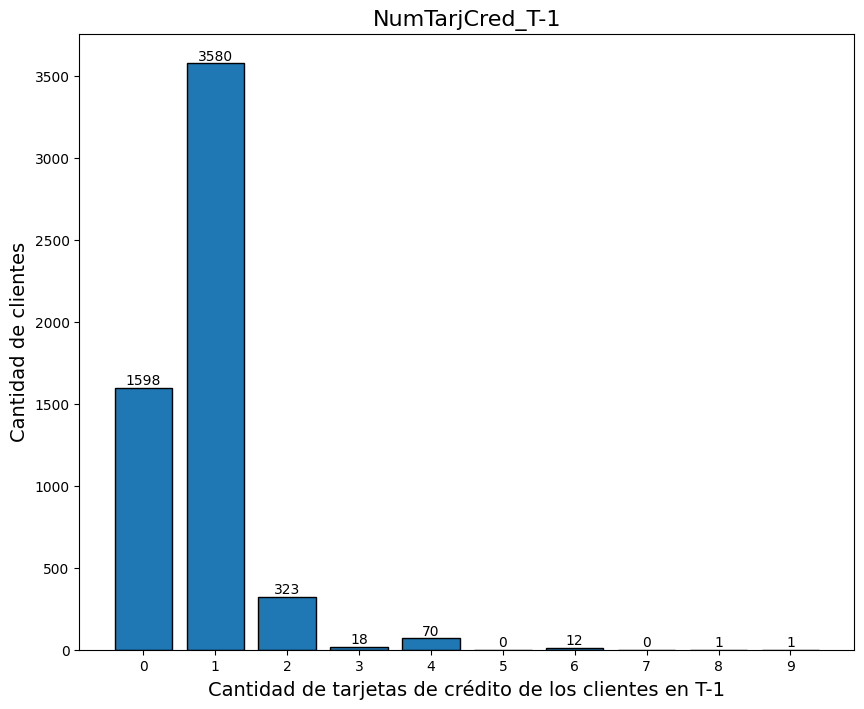

In [ ]:
# Se cuenta la frecuencia en cada categoria de la variable NumTarjCred_T-1
fNTCT1 = data_set['NumTarjCred_T-1'].value_counts()

# Asignación de valor 0 para las categorias no presentes en la vaiable
categorias = list(range(10))
fNTCT1 = fNTCT1.reindex(categorias, fill_value=0)

# Gráfico
plt.figure(figsize=(10,8))
plt.bar(fNTCT1.index, fNTCT1.values, edgecolor="black")

# Título y nombre de ejes
plt.xlabel('Cantidad de tarjetas de crédito de los clientes en T-1', fontsize = 14)
plt.ylabel('Cantidad de clientes', fontsize = 14)
plt.title('NumTarjCred_T-1', fontsize = 16)
plt.xticks(fNTCT1.index)  # Asegura que todos los valores únicos aparezcan en el eje x

# Agrega la cantidad de observaciones por categoría
for i, v in enumerate(fNTCT1.values):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=10)

plt.show()

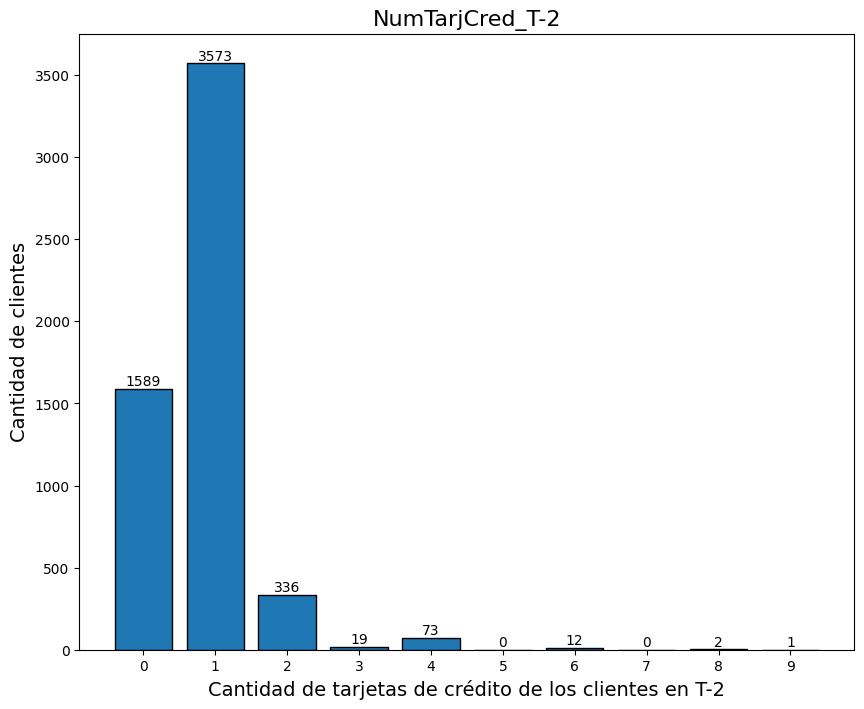

In [ ]:
# Se cuenta la frecuencia en cada categoria de la variable NumTarjCred_T-2
fNTCT2 = data_set['NumTarjCred_T-2'].value_counts()

# Asignación de valor 0 para las categorias no presentes en la vaiable
categorias = list(range(10))
fNTCT2 = fNTCT2.reindex(categorias, fill_value=0)

# Gráfico
plt.figure(figsize=(10,8))
plt.bar(fNTCT2.index, fNTCT2.values, edgecolor="black")

# Título y nombre de ejes
plt.xlabel('Cantidad de tarjetas de crédito de los clientes en T-2', fontsize = 14)
plt.ylabel('Cantidad de clientes', fontsize = 14)
plt.title('NumTarjCred_T-2', fontsize = 16)
plt.xticks(fNTCT2.index)  # Asegura que todos los valores únicos aparezcan en el eje x

# Agrega la Cantidad de observaciones por categoría
for i, v in enumerate(fNTCT2.values):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=10)

plt.show()

####Gráfico de barras agrupadas para las variables NumTarjCred_T, NumTarjCred_T-1 y NumTarjCred_T-2

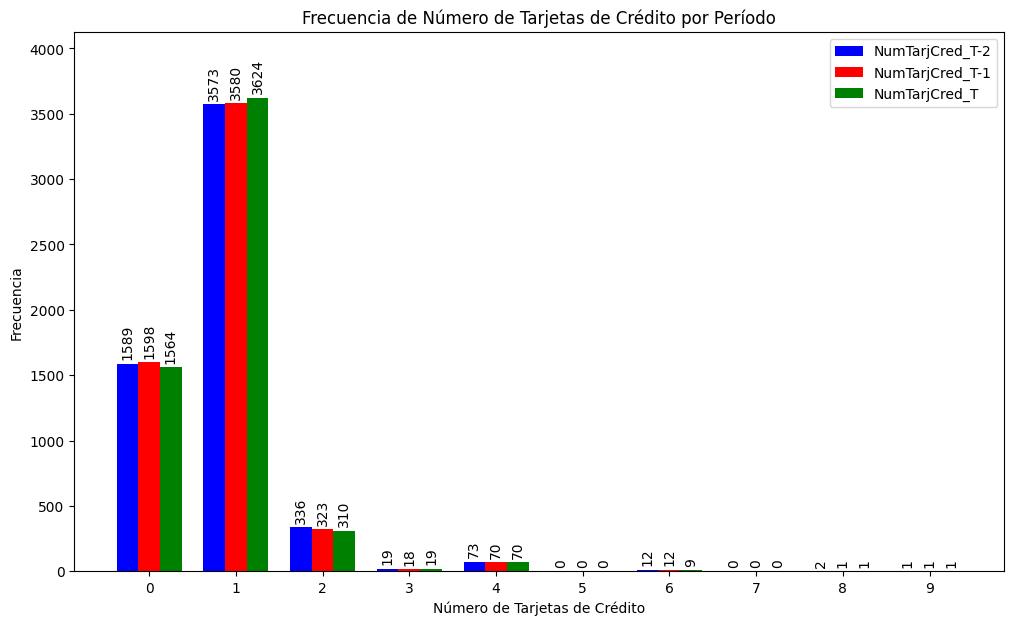

In [ ]:
# Configuración del gráfico
barWidth = 0.25
r1 = list(range(len(fNTCT2)))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.figure(figsize=(12,7))

# Crear barras
plt.bar(r1, fNTCT2, width=barWidth, color='blue', label='NumTarjCred_T-2')
plt.bar(r2, fNTCT1, width=barWidth, color='red', label='NumTarjCred_T-1')
plt.bar(r3, fNTCT, width=barWidth, color='green', label='NumTarjCred_T')

# Añade la frecuencia encima de cada barra
for i, v in enumerate(fNTCT2.values):
    plt.text(r1[i], v + 30, str(v), ha='center', va='bottom', rotation=90)
for i, v in enumerate(fNTCT1.values):
    plt.text(r2[i], v + 30, str(v), ha='center', va='bottom', rotation=90)
for i, v in enumerate(fNTCT.values):
    plt.text(r3[i], v + 30, str(v), ha='center', va='bottom', rotation=90)


# Configuración de ejes
plt.xlabel('Número de Tarjetas de Crédito')
plt.xticks([r + barWidth for r in range(len(fNTCT))], list(range(10)))
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Número de Tarjetas de Crédito por Período')

# Mostrar leyenda y gráfico
plt.legend()

# Ajuste altura eje Y
plt.ylim(0, max(fNTCT) + 500)

plt.show()

####Conclusiones sobre las variables NumTarjCred_T, NumTarjCred_T-1, NumTarjCred_T-2

#Aquí

Se puede ver que

#### Ingreso

A continuación se muestran los gráficos sobre la variable Ingreso:

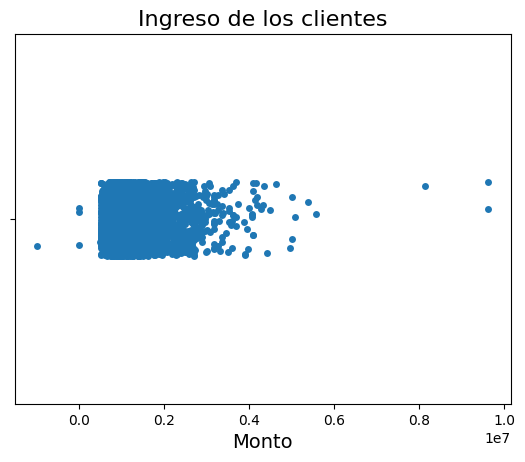

In [ ]:
b1= sn.stripplot(x='Ingreso', data=data_set)
b1.set_title('Ingreso de los clientes', fontsize = 16)
b1.set_xlabel('Monto', fontsize = 14)
plt.show()

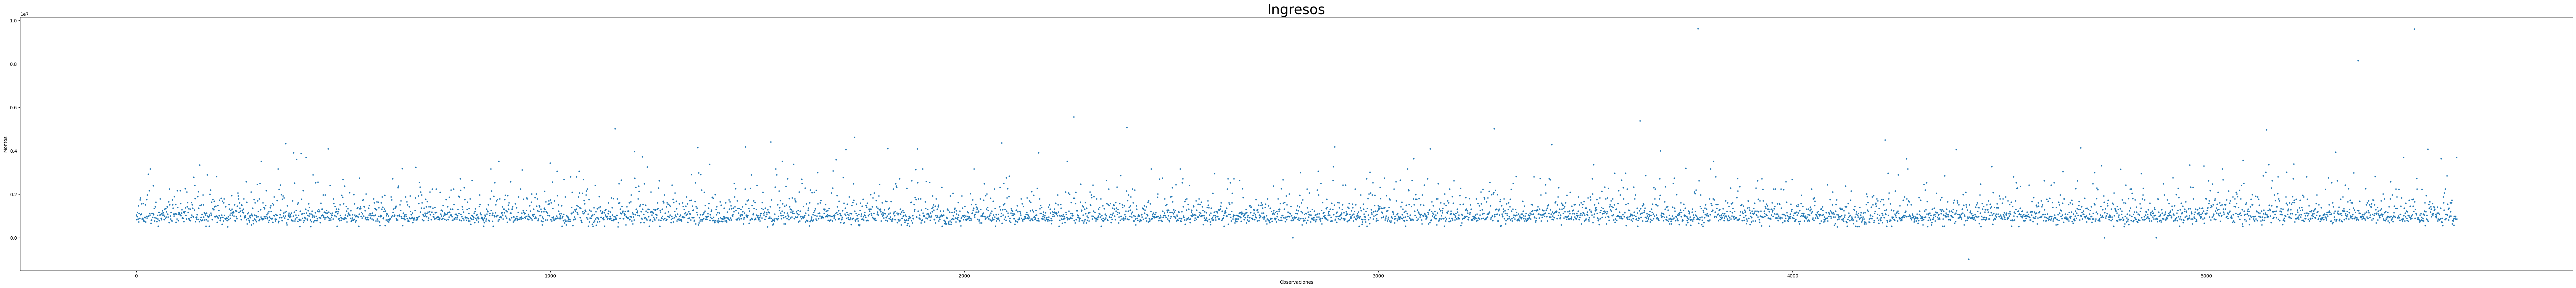

In [ ]:
x = list(range(len(data_set["Ingreso"])))
plt.figure(figsize=(100,10))
plt.scatter(x, data_set['Ingreso'], s = 5)
plt.xlabel("Observaciones")
plt.ylabel("Montos")
plt.title('Ingresos', fontsize = 30)
plt.show()

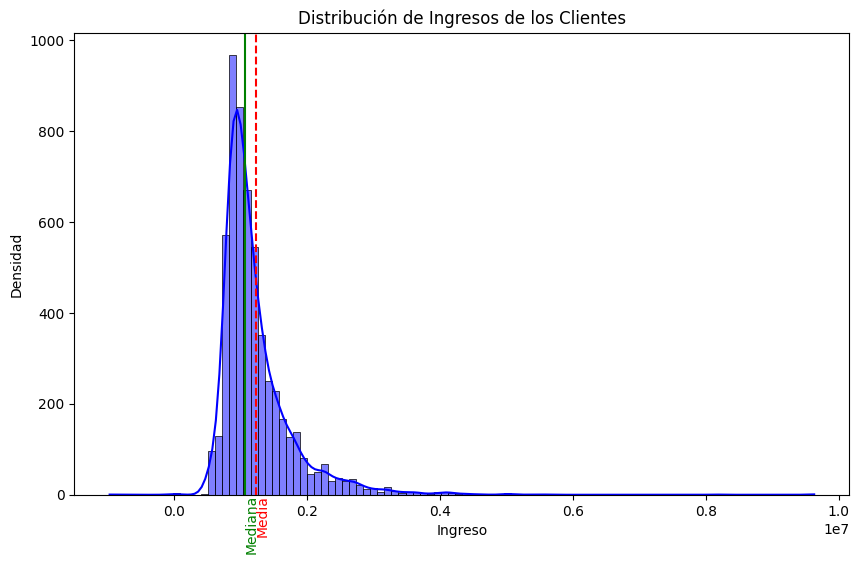

In [ ]:
plt.figure(figsize=(10,6))

# Crea el histograma y la KDE
sn.histplot(data_set['Ingreso'], bins=100, color='blue', kde=True)

# Calcula estadísticas
media = data_set['Ingreso'].mean()
mediana = data_set['Ingreso'].median()

# Dibuja líneas verticales para las estadísticas
plt.axvline(media, color='red', linestyle='--', label='Media')
plt.axvline(mediana, color='green', linestyle='-', label='Mediana')

# Añade etiquetas para las estadísticas
plt.text(media, 0.02, 'Media', color='red', rotation=90, va='top')
plt.text(mediana, 0.02, 'Mediana', color='green', rotation=90, va='top')

# Configuración del gráfico
plt.title('Distribución de Ingresos de los Clientes')
plt.xlabel('Ingreso')
plt.ylabel('Densidad')

# Mostrar el gráfico
plt.show()

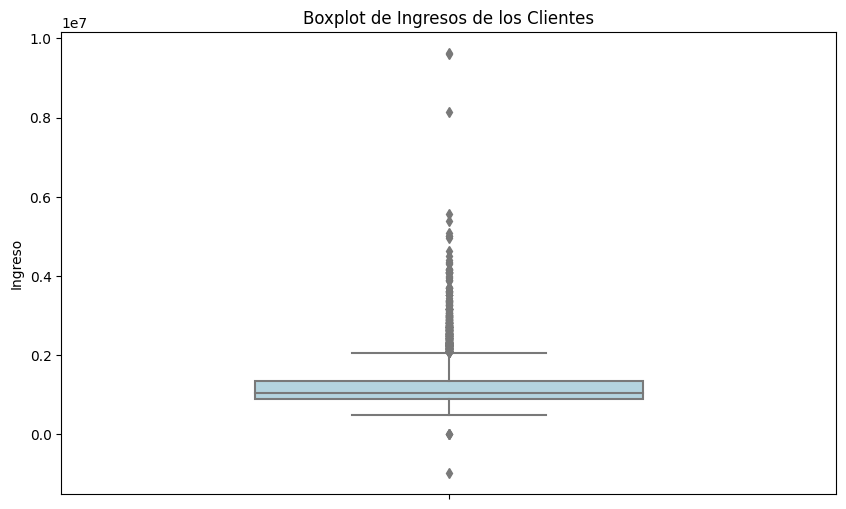

In [ ]:
# Configura el gráfico
plt.figure(figsize=(10,6))

# Crea el boxplot
sn.boxplot(y=data_set['Ingreso'], color='lightblue', width=0.5)

# Configuración del gráfico
plt.title('Boxplot de Ingresos de los Clientes')
plt.ylabel('Ingreso')

# Mostrar el gráfico
plt.show()

####Conclusiones sobre la  variable Ingreso:

#Aquí

Se puede ver que

#### Edad

A continuación se presentan los gráficos de la variable Edad:

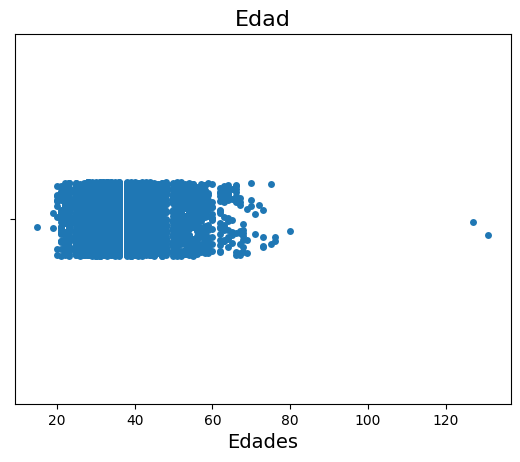

In [ ]:
c1= sn.stripplot(x='Edad', data=data_set)
c1.set_title('Edad', fontsize = 16)
c1.set_xlabel('Edades', fontsize = 14)
plt.show()

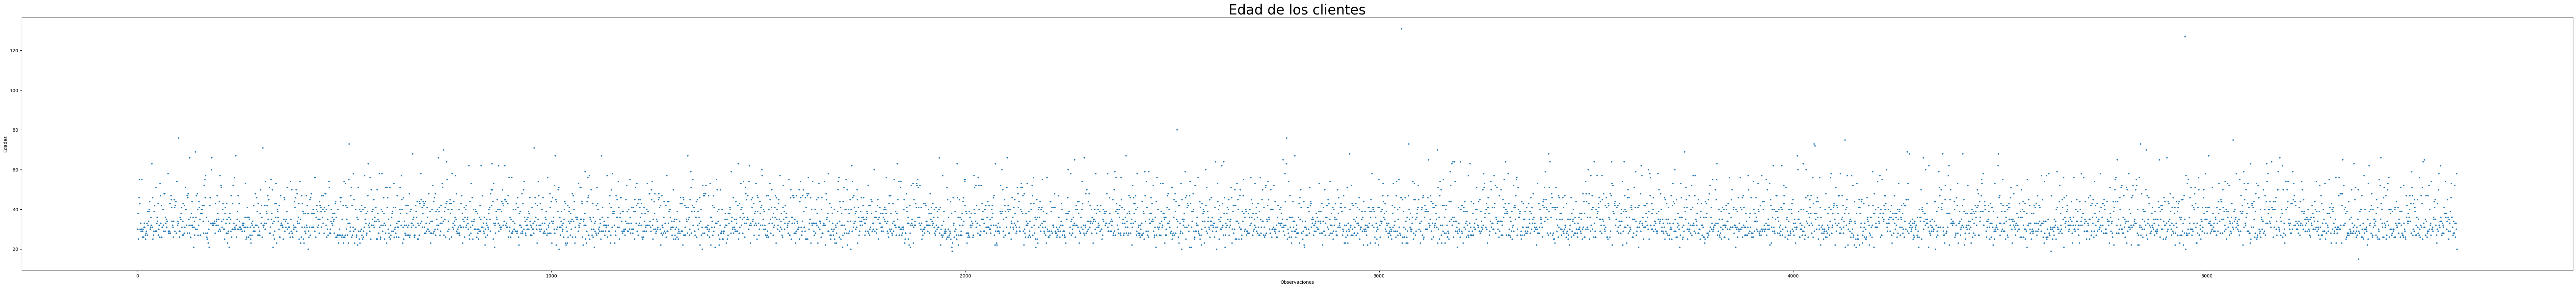

In [ ]:
x = list(range(len(data_set["Edad"])))
plt.figure(figsize=(100,10))
plt.scatter(x, data_set['Edad'], s = 5)
plt.xlabel("Observaciones")
plt.ylabel("Edades")
plt.title('Edad de los clientes', fontsize = 30)
plt.show()

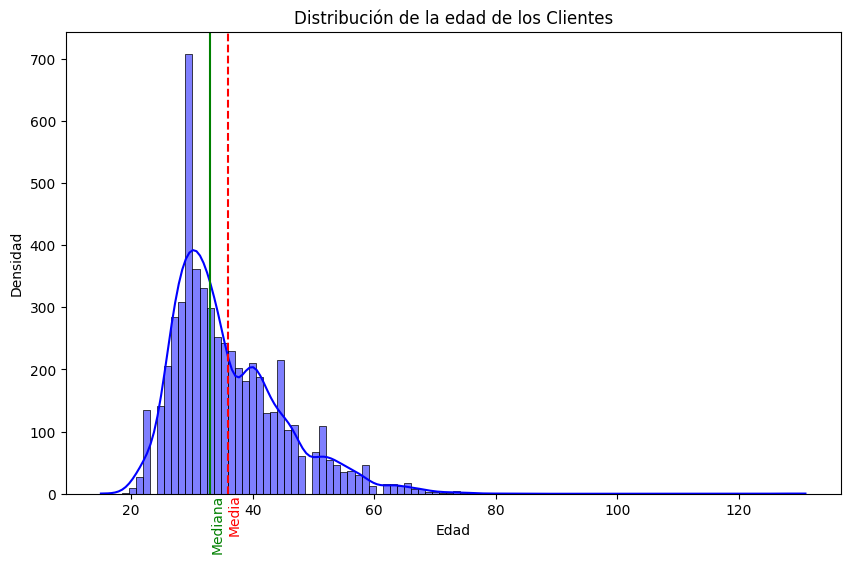

In [ ]:
plt.figure(figsize=(10,6))

# Crea el histograma y la KDE
sn.histplot(data_set['Edad'], bins=100, color='blue', kde=True)

# Calcula estadísticas
media = data_set['Edad'].mean()
mediana = data_set['Edad'].median()

# Dibuja líneas verticales para las estadísticas
plt.axvline(media, color='red', linestyle='--', label='Media')
plt.axvline(mediana, color='green', linestyle='-', label='Mediana')

# Añade etiquetas para las estadísticas
plt.text(media, 0.02, 'Media', color='red', rotation=90, va='top')
plt.text(mediana, 0.02, 'Mediana', color='green', rotation=90, va='top')

# Configuración del gráfico
plt.title('Distribución de la edad de los Clientes')
plt.xlabel('Edad')
plt.ylabel('Densidad')

# Mostrar el gráfico
plt.show()

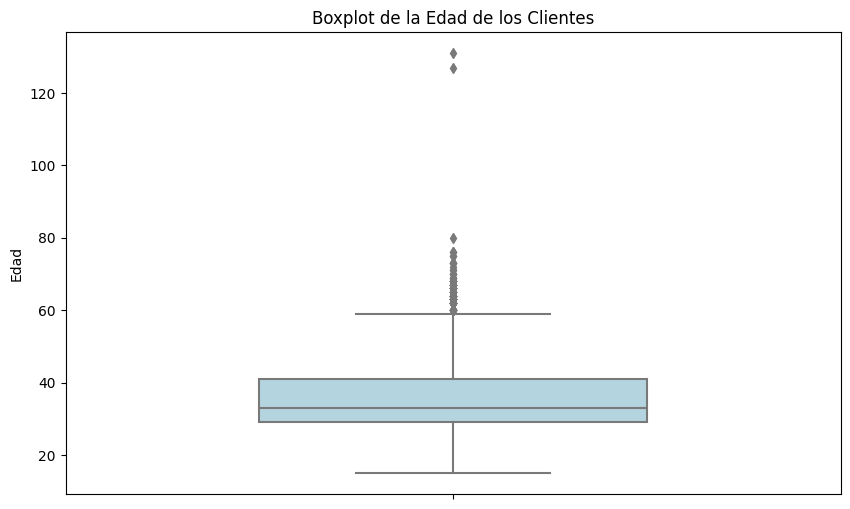

In [ ]:
# Configura el gráfico
plt.figure(figsize=(10,6))

# Crea el boxplot
sn.boxplot(y=data_set['Edad'], color='lightblue', width=0.5)

# Configuración del gráfico
plt.title('Boxplot de la Edad de los Clientes')
plt.ylabel('Edad')

# Mostrar el gráfico
plt.show()

####Conclusiones sobre la variable Edad:

#Aquí

Podemos concluir que la variable Edad ...

####NumTransWeb_T / NumTransWeb_T-2 / NumTransWeb_T-2

A continuación se presentan los gráficos del número de transferencias web realizadas por los clientes en los periodos de tiempo T, T-1 y T-2.

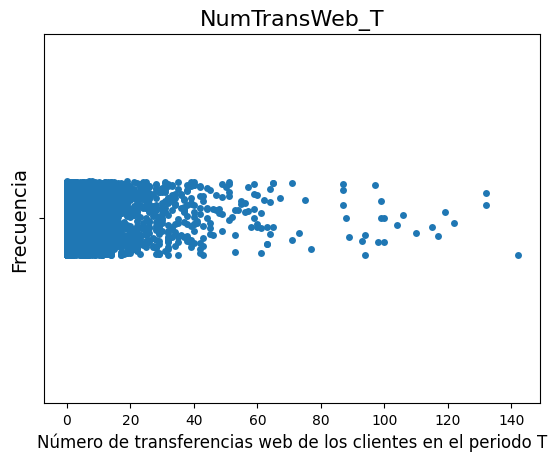

In [ ]:
d1= sn.stripplot(x='NumTransWeb_T', data=data_set)
d1.set_title('NumTransWeb_T', fontsize = 16)
d1.set_xlabel('Número de transferencias web de los clientes en el periodo T', fontsize = 12)
d1.set_ylabel('Frecuencia', fontsize = 14)
plt.show()

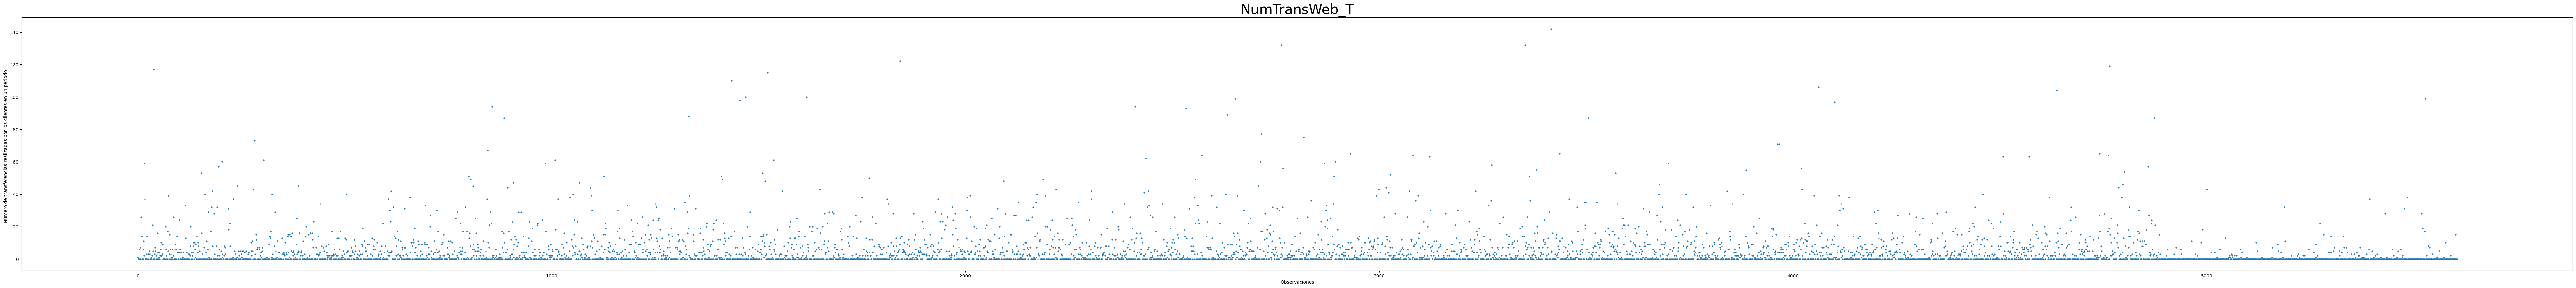

In [ ]:
x = list(range(len(data_set["NumTransWeb_T"])))
plt.figure(figsize=(100,10))
plt.scatter(x, data_set['NumTransWeb_T'], s = 5)
plt.xlabel("Observaciones")
plt.ylabel("Número de transferencias realizadas por los clientes en un periodo T")
plt.title('NumTransWeb_T', fontsize = 30)
plt.show()

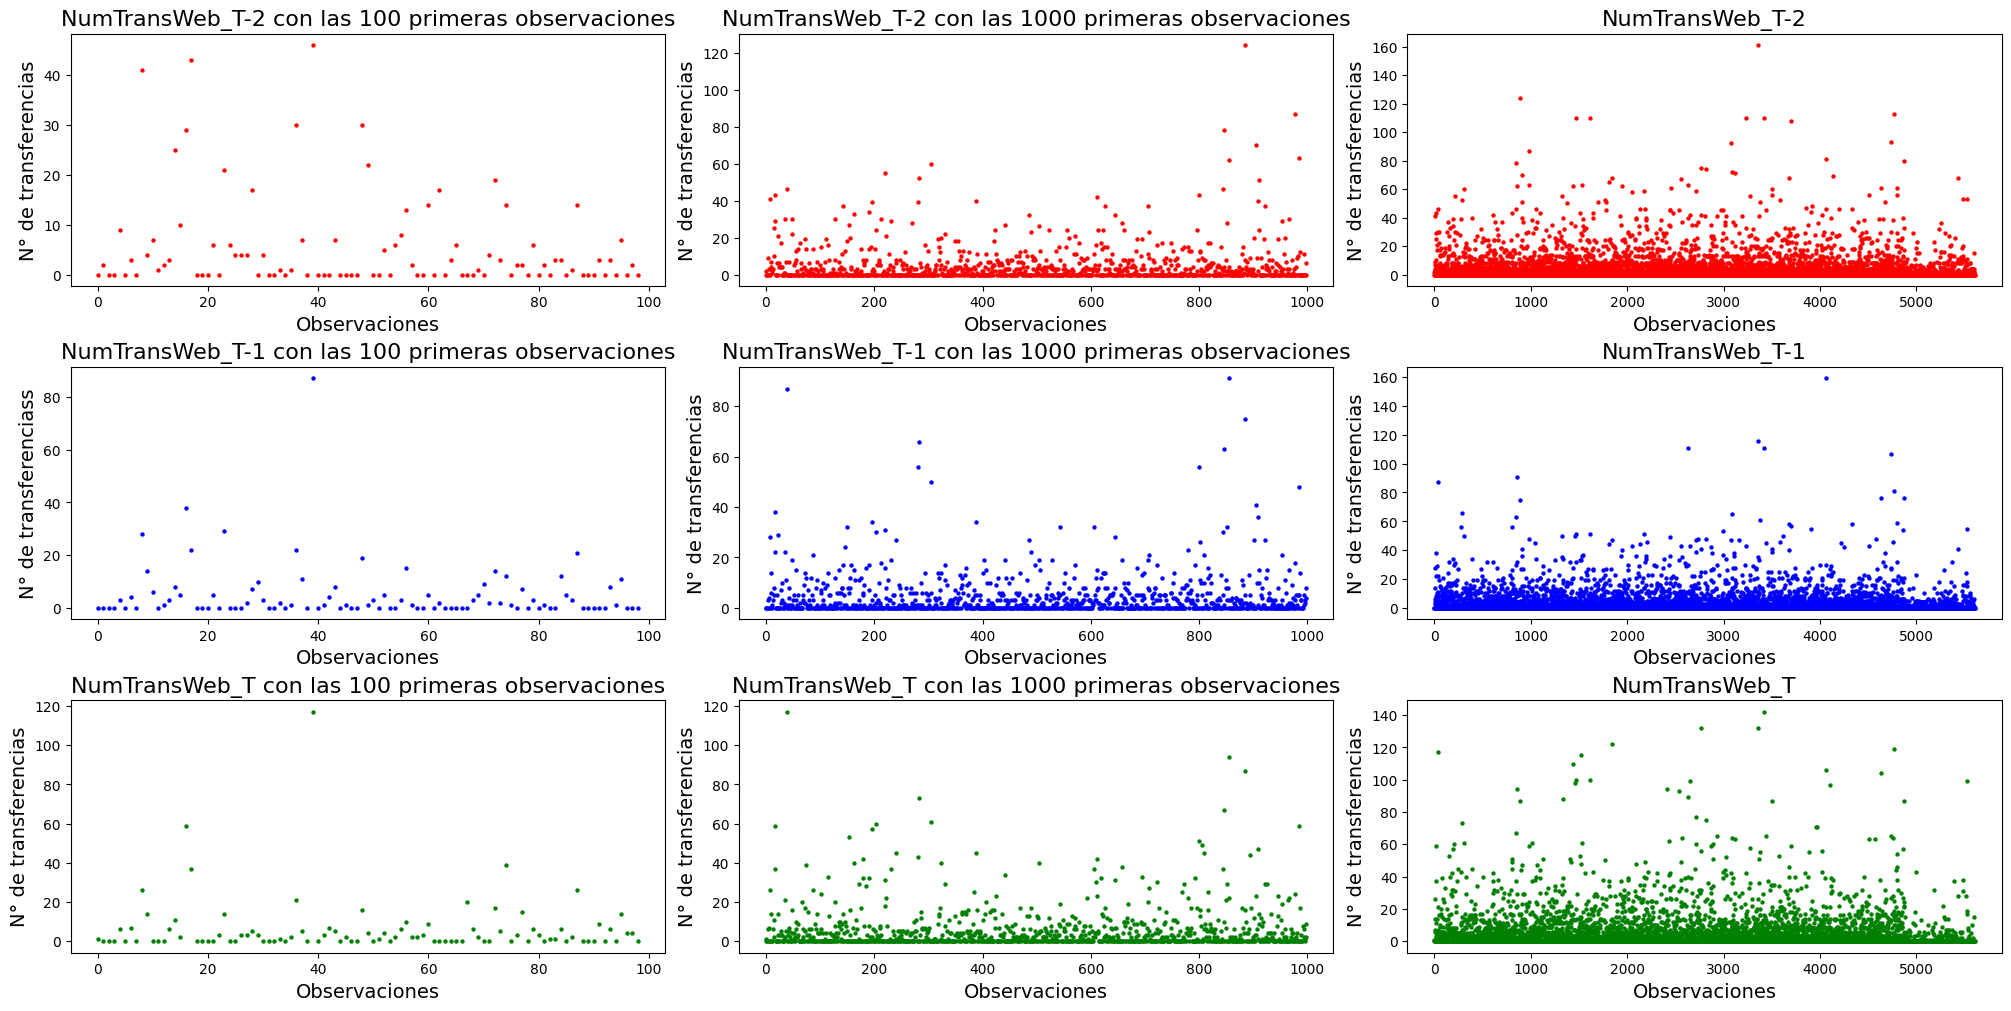

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=3, layout='constrained', figsize=(20, 10))

x = list(range(0,99))
y = list(range(0,999))
z = list(range(0,5605))

axs[0, 0].scatter(x, data_set['NumTransWeb_T-2'][:99], color ="red", linewidth=0, s = 10)
axs[0, 0].set_title('NumTransWeb_T-2 con las 100 primeras observaciones', fontsize = 16)
axs[0, 0].set_xlabel('Observaciones', fontsize = 14)
axs[0, 0].set_ylabel('N° de transferencias', fontsize = 14)
axs[0, 1].scatter(y, data_set['NumTransWeb_T-2'][:999], color ="red", linewidth=0, s = 10)
axs[0, 1].set_title('NumTransWeb_T-2 con las 1000 primeras observaciones', fontsize = 16)
axs[0, 1].set_xlabel('Observaciones', fontsize = 14)
axs[0, 1].set_ylabel('N° de transferencias', fontsize = 14)
axs[0, 2].scatter(z, data_set['NumTransWeb_T-2'], color ="red", linewidth=0, s = 10)
axs[0, 2].set_title('NumTransWeb_T-2', fontsize = 16)
axs[0, 2].set_xlabel('Observaciones', fontsize = 14)
axs[0, 2].set_ylabel('N° de transferencias', fontsize = 14)
axs[1, 0].scatter(x, data_set['NumTransWeb_T-1'][:99], color ="blue", linewidth=0, s = 10)
axs[1, 0].set_title('NumTransWeb_T-1 con las 100 primeras observaciones', fontsize = 16)
axs[1, 0].set_xlabel('Observaciones', fontsize = 14)
axs[1, 0].set_ylabel('N° de transferenciass', fontsize = 14)
axs[1, 1].scatter(y, data_set['NumTransWeb_T-1'][:999], color ="blue", linewidth=0, s = 10)
axs[1, 1].set_title('NumTransWeb_T-1 con las 1000 primeras observaciones', fontsize = 16)
axs[1, 1].set_xlabel('Observaciones', fontsize = 14)
axs[1, 1].set_ylabel('N° de transferencias', fontsize = 14)
axs[1, 2].scatter(z, data_set['NumTransWeb_T-1'], color ="blue", linewidth=0, s = 10)
axs[1, 2].set_title('NumTransWeb_T-1', fontsize = 16)
axs[1, 2].set_xlabel('Observaciones', fontsize = 14)
axs[1, 2].set_ylabel('N° de transferencias', fontsize = 14)
axs[2, 0].scatter(x, data_set['NumTransWeb_T'][:99], color ="green", linewidth=0, s = 10)
axs[2, 0].set_title('NumTransWeb_T con las 100 primeras observaciones', fontsize = 16)
axs[2, 0].set_xlabel('Observaciones', fontsize = 14)
axs[2, 0].set_ylabel('N° de transferencias', fontsize = 14)
axs[2, 1].scatter(y, data_set['NumTransWeb_T'][:999], color ="green", linewidth=0, s = 10)
axs[2, 1].set_title('NumTransWeb_T con las 1000 primeras observaciones', fontsize = 16)
axs[2, 1].set_xlabel('Observaciones', fontsize = 14)
axs[2, 1].set_ylabel('N° de transferencias', fontsize = 14)
axs[2, 2].scatter(z, data_set['NumTransWeb_T'], color ="green", linewidth=0, s = 10)
axs[2, 2].set_title('NumTransWeb_T', fontsize = 16)
axs[2, 2].set_xlabel('Observaciones', fontsize = 14)
axs[2, 2].set_ylabel('N° de transferencias', fontsize = 14)

plt.show()

####Conclusiones sobre las variables NumTransWeb_T, NumTransWeb_T-1, NumTransWeb-2

#Aquí

Se puede ver que

####MargenComp_T

A continuación se presentan los gráficos del margen de contribución de cada cliente en los periodos de tiempo T, T-1 y T-2, T-3, T-4, T-5, T-6.

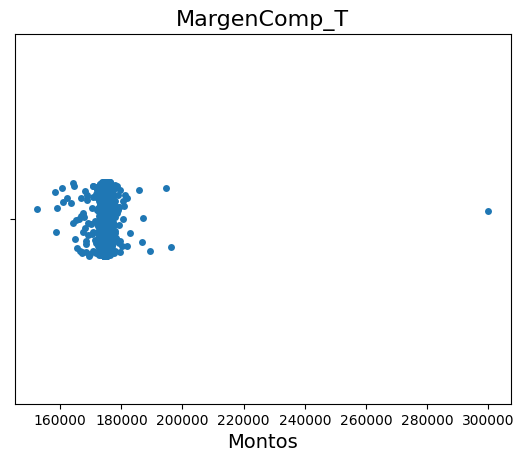

In [ ]:
e1= sn.stripplot(x='MargenComp_T', data=data_set)
e1.set_title('MargenComp_T', fontsize = 16)
e1.set_xlabel('Montos', fontsize = 14)
plt.show()

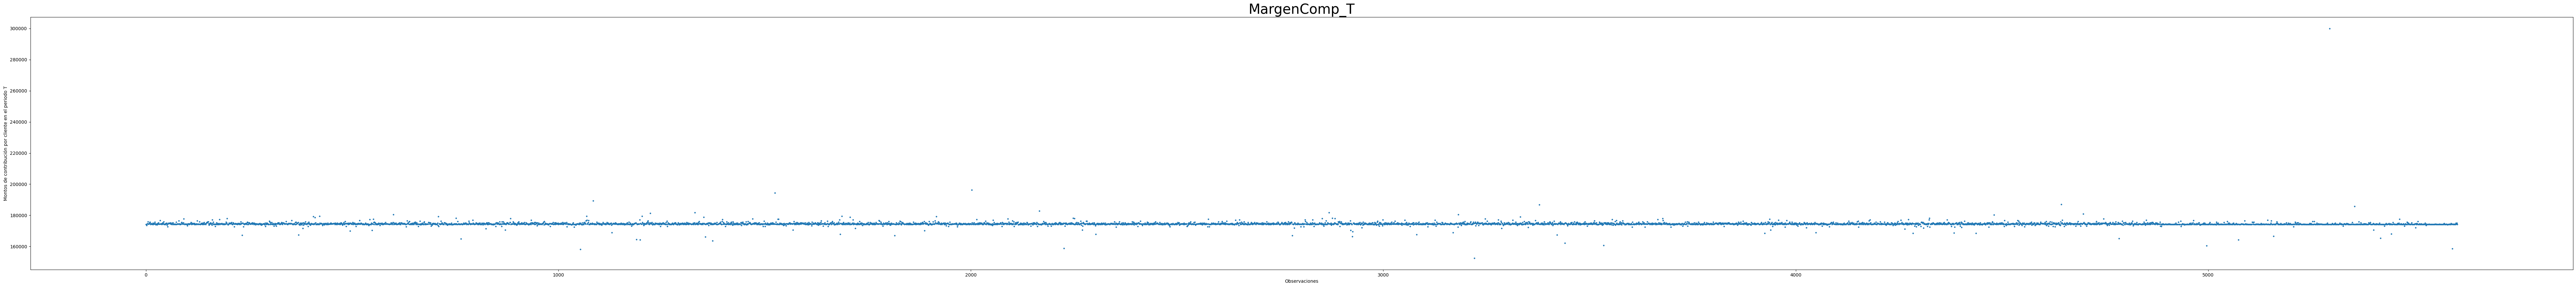

In [ ]:
x = list(range(len(data_set["MargenComp_T"])))
plt.figure(figsize=(100,10))
plt.scatter(x, data_set['MargenComp_T'], s = 5)
plt.xlabel("Observaciones")
plt.ylabel("Montos de contribución por cliente en el periodo T")
plt.title('MargenComp_T', fontsize = 30)
plt.show()

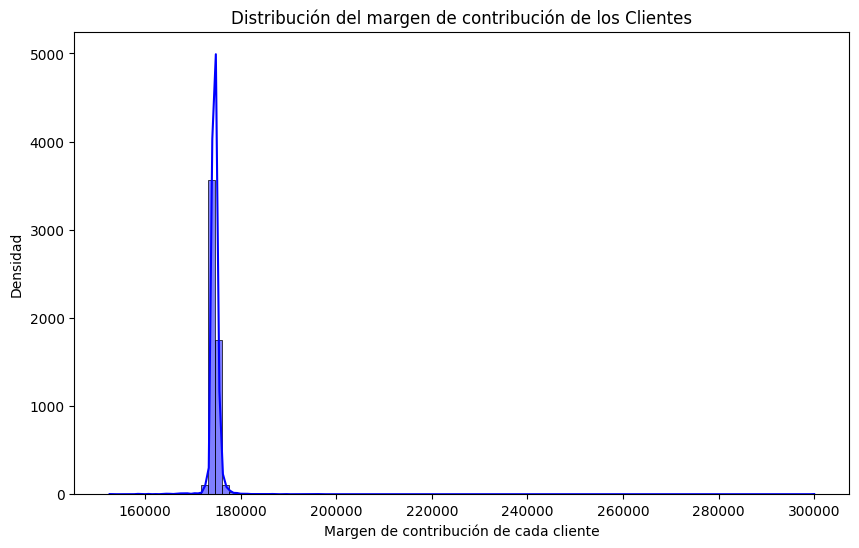

In [ ]:
plt.figure(figsize=(10,6))

# Crea el histograma y la KDE
sn.histplot(data_set['MargenComp_T'], bins=100, color='blue', kde=True)

# Calcula estadísticas
media = data_set['MargenComp_T'].mean()
mediana = data_set['MargenComp_T'].median()

# Configuración del gráfico
plt.title('Distribución del margen de contribución de los Clientes')
plt.xlabel('Margen de contribución de cada cliente')
plt.ylabel('Densidad')

# Mostrar el gráfico
plt.show()

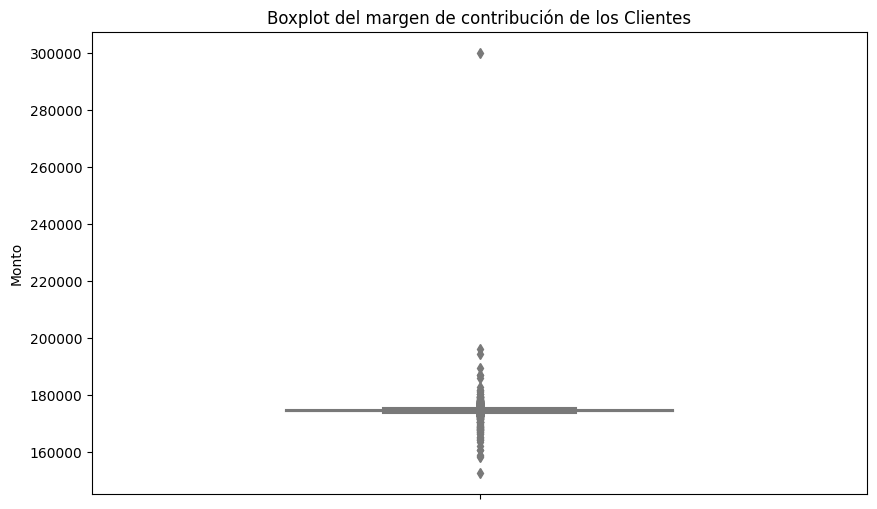

In [ ]:
# Configura el gráfico
plt.figure(figsize=(10,6))

# Crea el boxplot
sn.boxplot(y=data_set['MargenComp_T'], color='lightblue', width=0.5)

# Configuración del gráfico
plt.title('Boxplot del margen de contribución de los Clientes')
plt.ylabel('Monto')

# Mostrar el gráfico
plt.show()

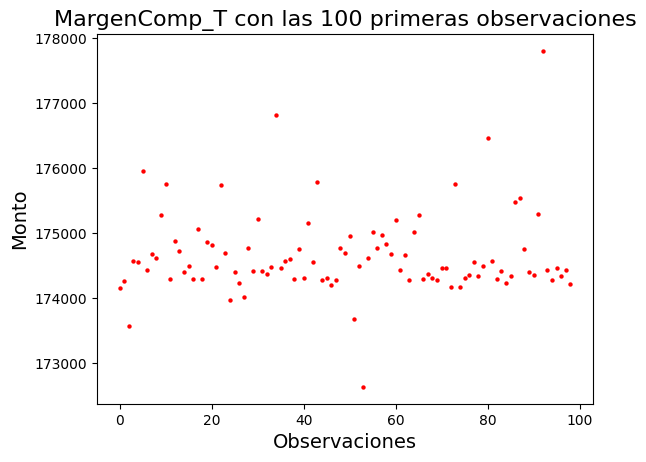

In [ ]:
x = list(range(0,99))

plt.scatter(x, data_set['MargenComp_T'][:99], color ="red", linewidth=0, s = 10)
plt.title('MargenComp_T con las 100 primeras observaciones', fontsize = 16)
plt.xlabel('Observaciones', fontsize = 14)
plt.ylabel('Monto', fontsize = 14)
plt.show()

In [ ]:
fig, axs = plt.subplots(nrows=7, ncols=3, layout='constrained', figsize=(20, 40))

x = list(range(0,99))
y = list(range(0,999))
z = list(range(0,5605))

# Añade la frecuencia encima de cada barra
for i, v in enumerate(fNTCT2.values):
    plt.text(r1[i], v + 30, str(v), ha='center', va='bottom', rotation=90)
for i, v in enumerate(fNTCT1.values):
    plt.text(r2[i], v + 30, str(v), ha='center', va='bottom', rotation=90)
for i, v in enumerate(fNTCT.values):
    plt.text(r3[i], v + 30, str(v), ha='center', va='bottom', rotation=90)

# Configuración de ejes
plt.xlabel('Número de Tarjetas de Crédito')
plt.xticks([r + barWidth for r in range(len(fNTCT))], list(range(10)))
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Número de Tarjetas de Crédito por Período')

# Mostrar leyenda y gráfico
plt.legend()

# Ajuste altura eje Y
plt.ylim(0, max(fNTCT) + 500)

plt.show()



for

axs[0, 0].scatter(x, data_set['NumTransWeb_T-2'][:99], color ="red", linewidth=0, s = 10)
axs[0, 0].set_title('NumTransWeb_T-2 con las 100 primeras observaciones', fontsize = 16)
axs[0, 0].set_xlabel('Observaciones', fontsize = 14)
axs[0, 0].set_ylabel('N° de transferencias', fontsize = 14)
axs[0, 1].scatter(y, data_set['NumTransWeb_T-2'][:999], color ="red", linewidth=0, s = 10)
axs[0, 1].set_title('NumTransWeb_T-2 con las 1000 primeras observaciones', fontsize = 16)
axs[0, 1].set_xlabel('Observaciones', fontsize = 14)
axs[0, 1].set_ylabel('N° de transferencias', fontsize = 14)
axs[0, 2].scatter(z, data_set['NumTransWeb_T-2'], color ="red", linewidth=0, s = 10)
axs[0, 2].set_title('NumTransWeb_T-2', fontsize = 16)
axs[0, 2].set_xlabel('Observaciones', fontsize = 14)
axs[0, 2].set_ylabel('N° de transferencias', fontsize = 14)
axs[1, 0].scatter(x, data_set['NumTransWeb_T-1'][:99], color ="blue", linewidth=0, s = 10)
axs[1, 0].set_title('NumTransWeb_T-1 con las 100 primeras observaciones', fontsize = 16)
axs[1, 0].set_xlabel('Observaciones', fontsize = 14)
axs[1, 0].set_ylabel('N° de transferenciass', fontsize = 14)
axs[1, 1].scatter(y, data_set['NumTransWeb_T-1'][:999], color ="blue", linewidth=0, s = 10)
axs[1, 1].set_title('NumTransWeb_T-1 con las 1000 primeras observaciones', fontsize = 16)
axs[1, 1].set_xlabel('Observaciones', fontsize = 14)
axs[1, 1].set_ylabel('N° de transferencias', fontsize = 14)
axs[1, 2].scatter(z, data_set['NumTransWeb_T-1'], color ="blue", linewidth=0, s = 10)
axs[1, 2].set_title('NumTransWeb_T-1', fontsize = 16)
axs[1, 2].set_xlabel('Observaciones', fontsize = 14)
axs[1, 2].set_ylabel('N° de transferencias', fontsize = 14)
axs[2, 0].scatter(x, data_set['NumTransWeb_T'][:99], color ="green", linewidth=0, s = 10)
axs[2, 0].set_title('NumTransWeb_T con las 100 primeras observaciones', fontsize = 16)
axs[2, 0].set_xlabel('Observaciones', fontsize = 14)
axs[2, 0].set_ylabel('N° de transferencias', fontsize = 14)
axs[2, 1].scatter(y, data_set['NumTransWeb_T'][:999], color ="green", linewidth=0, s = 10)
axs[2, 1].set_title('NumTransWeb_T con las 1000 primeras observaciones', fontsize = 16)
axs[2, 1].set_xlabel('Observaciones', fontsize = 14)
axs[2, 1].set_ylabel('N° de transferencias', fontsize = 14)
axs[2, 2].scatter(z, data_set['NumTransWeb_T'], color ="green", linewidth=0, s = 10)
axs[2, 2].set_title('NumTransWeb_T', fontsize = 16)
axs[2, 2].set_xlabel('Observaciones', fontsize = 14)
axs[2, 2].set_ylabel('N° de transferencias', fontsize = 14)

plt.show()

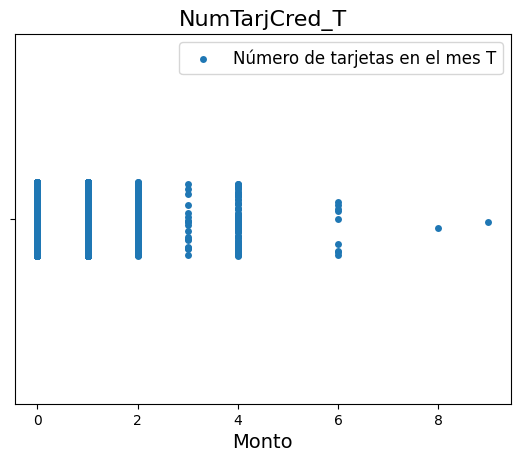

In [ ]:
a1= sn.stripplot(x='NumTarjCred_T', data=data_set)
a1.set_title('NumTarjCred_T', fontsize = 16)
a1.set_xlabel('Monto', fontsize = 14)
a1.legend(['Número de tarjetas por cliente en el mes T'], fontsize = 12)
plt.show()

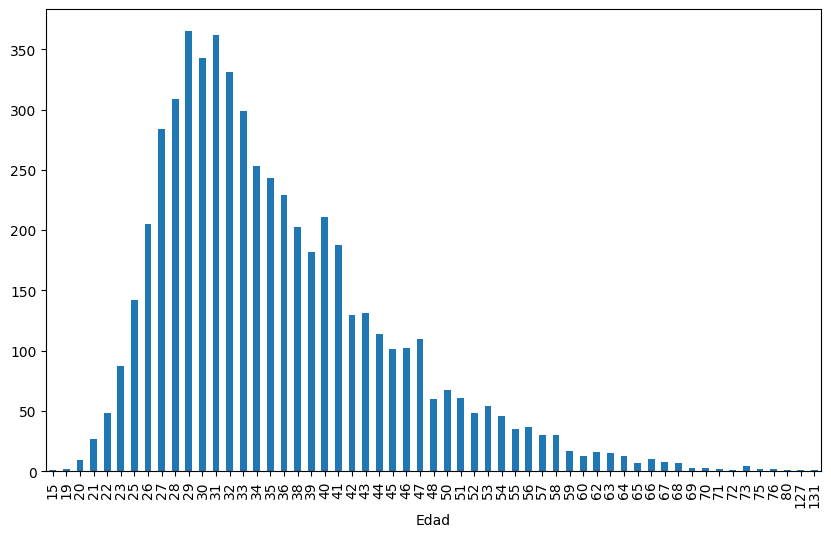

In [ ]:
data_set['Edad'].value_counts().sort_index().plot.bar(figsize=(10,6))
plt.xlabel('Edad')
plt.show()

Vemos que existe una persona con edad 1970, lo que no es posible, por lo tanto tenemos que corregir esta inconsistencia. El histograma de puntos permite visualizar valores atípicos (*outliers*), por ejemplo en la variable ingreso:

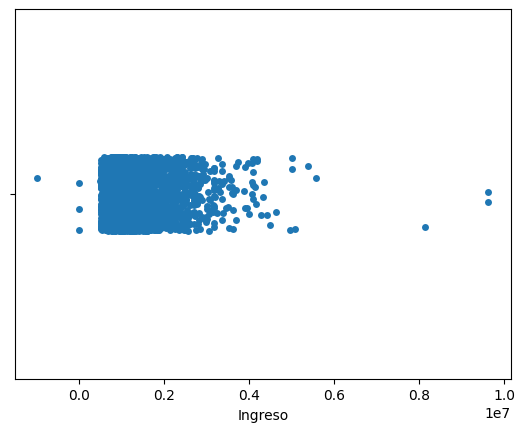

In [ ]:
sn.stripplot(x='Ingreso', data=data_set)
plt.show()

## Análisis Bivariado y gráficos

Todo lo anterior se asocia al **análisis univariado**, es decir, solo una variable a la vez. Podemos realizar **análisis bivariado** con el *Histograma color*, y así ver la relevancia de un atributo en relación a la variable objetivo. En este caso analizamos las variables de años en el mismo empleo y nivel educacional:

In [ ]:
data_set.groupby(['AgnosEmpleo', 'VarObj']).size().unstack().plot.bar(stacked=True)
plt.xscale('linear')
plt.show()
data_set.groupby(['NivelEdu', 'VarObj']).size().unstack().plot.bar(stacked=True)
plt.show()

KeyError: ignored

En el primer gráfico vemos claramente que la variable (1) es relevante y (2) se comporta de forma esperada: a mayor años trabajando en el mismo empleo (nos movemos a la derecha por el eje X), los clientes son en promedio menos riesgosos (la proporción de azul en las barras va creciendo).

El segundo gráfico es menos claro en el patrón, pero da la impresión de que el riesgo es mayor en categorías como ed. superior completa (SupCom) e incompleta (SupInc) en relación a categorías con menor nivel educacional, como ed. básica. Este patrón es claramente inconsistente con lo que uno esperaría de la realidad, que es "a mayor nivel educacional, menor riesgo".

¿Qué podría estar causando esta inconsistencia? En riesgo de crédito existe el problema del *sesgo de selección*: nuestros datos consisten en solo los clientes que fueron aceptados por la entidad financiera. Probablemente, muchos clientes con un nivel edicuacional bajo fueron rechazados, y quedaron sólo aquellos que mostraban un alto potencial crediticio (ingreso alto, bajas deudas, etc.). Por otro lado, los clientes con estudios universitarios pueden haber sido aceptados sin solicitar mayores antecedentes, lo que puede explicar su mayor riesgo intrínsico.

Una variable inconsistente con la realidad debería ser descartada con fines predictivos ya que introduce un sesgo indeseado en el modelo. Si lo que buscamos es reemplazar el modelo original que acepta y rechaza clientes, tenderíamos a favorecer a potenciales clientes con un menor nivel educacional. Este análisis es muy importante ya que la máquina no puede hacerlo (no sabe lo que se espera de una variable).

Cuando los patrones no son muy claros, podemos hacer el histograma color con proporciones en vez de conteos:

In [ ]:
data_set.groupby(['AgnosEmpleo', 'VarObj']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot.bar(stacked=True)
plt.xscale('linear')
plt.show()
data_set.groupby(['NivelEdu', 'VarObj']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot.bar(stacked=True)
plt.show()

El *gráfico de cajas* o *box plot* es bastante útil como alternativa al histograma color ya que puede entregar la misma información de la distribución pero en una sola dimensión (vertical). Esto permite presentar las diferentes distribuciones de forma separada y así es más fácil contrastar las diferencias:

In [ ]:
sn.boxplot(x="VarObj", y="AgnosEmpleo", data=data_set)
plt.show()

Finalmente, el *gráfico de dispersión* (*scatter plot*) permite ver redundancia y relaciones bivariadas entre dos variables numéricas:

In [ ]:
data_set.plot(kind='scatter', x='AgnosDirec', y='AgnosEmpleo', grid=True)
plt.show()

# Limpieza de datos

La limpieza de datos es eliminar las incongruencias encontradas en el análisis exploratorio de datos, como valores perdidos y valores atípicos, para poder trabajar la base de datos sin que estos alteren los resultados.

Primero declaramos inconsistencias como valores perdidos, para luego imputar valores perdidos.


## Inconsistencias

La variable Edad no puede tener valores mayores a 100, dejando los mayores a este numero como valores nulos. Lo mismo se realiza para ingresos menores a 0.

In [ ]:
data_set.loc[data_set['Ingreso'] < 1, ['Ingreso']] = np.nan
data_set.loc[data_set['Ingreso2'] < 1, ['Ingreso2']] = np.nan
data_set.loc[data_set['Edad'] > 100, ['Edad']] = np.nan

## Imputar valores perdidos

Para hacernos cargo de los valores perdidos, proponemos tres alternativas (solo la primera se implementa; las restantes se presentan por completitud).

**Alternativa 1: Remplazo por mediana / moda**

Esta alternativa la utilizamos cuando los valores perdidos son menores al 5% del total de los datos. Reemplazamos por la mediana en las variables numéricas (la media también se puede utilizar):

In [ ]:
data_set['Edad'].fillna(data_set['Edad'].median(skipna =True), inplace=True)
data_set['AgnosDirec'].fillna(data_set['AgnosDirec'].median(skipna =True), inplace=True)
data_set['AgnosEmpleo'].fillna(data_set['AgnosEmpleo'].median(skipna =True), inplace=True)
data_set['Ingreso'].fillna(data_set['Ingreso'].median(skipna =True), inplace=True)
data_set['Ingreso2'].fillna(data_set['Ingreso2'].median(skipna =True), inplace=True)
data_set['DeudaExt'].fillna(data_set['DeudaExt'].median(skipna =True), inplace=True)
data_set['DeudaInt'].fillna(data_set['DeudaInt'].median(skipna =True), inplace=True)

Reemplazamos por la moda en las variables categóricas (esto es solo por completitud ya que "NivelEdu" será descartada):

In [ ]:
mode = data_set['NivelEdu'].mode()
data_set['NivelEdu'].fillna(mode[0], inplace=True)

**Alternativa 2: Eliminación de casos (filas)**

Esta alternativa también la podemos utilizar cuando los valores perdidos son menores al 5% del total de los datos y tenemos una gran cantidad de registros. La ventaja es que no inventamos valores como en el caso anterior pero perdemos la información de las otras variables en la fila. La ventaja es que se puede implementar de forma muy simple:


In [ ]:
data_set = data_set.dropna(axis=0, how='any')

**Alternativa 3: Imputación múltiple**

La imputación múltiple consiste en rellenar todos los valores faltantes de forma simultánea utilizando simulación. La idea es respetar tanto las distribuciones de cada variable como las correlaciones entre ellas. Es lo más sofisticado que sugerimos, y es altamente recomendable cuando tenemos una base de datos pequeña/mediana, y un porcentaje más alto de valores perdidos (digamos, 5% a 30%). Nota: este método no suele funcionar para variables categóricas (hay que reemplazarlas por la moda antes).



In [ ]:
imp = IterativeImputer(max_iter=10, random_state=12700)
num = data_set.select_dtypes(include=["number"])
cat = data_set.select_dtypes(exclude=["number"])
names = num.columns
num = pd.DataFrame(imp.fit_transform(num))
num.columns = names
data_set = pd.concat([num, cat], axis=1)

Corroboramos que no existan valores perdidos en la base de datos:

In [ ]:
data_set.isnull().sum()

Antes de continuar, eliminamos la variable ID ya que no aporta información al modelo (es un correlativo).

In [ ]:
del data_set['ID']

# Transformación

La transformación de datos tiene tres objetivos principales: (1) mejorar la capacidad predictiva de una variable, (2) dar sentido matemático a las variables, y (3) igualar pesos relativos. Este tercer objetivo lo dejaremos para el final del laboratorio.


## Agregación

Si una variable es categórica, podeos agrupar alternativas. Para "NivelEdu", por ejemplo, podemos construir "SupCom" + "Posg" = "Completa". Esto permite reducir la cantidad de variables binarias cuando le damos sentido matemático. De todos modos, esta variable será descartada y lo presentamos sólo como un ejemplo de código.

In [ ]:
data_set['NivelEdu'] = data_set['NivelEdu'].replace('SupCom', 'Completa')
data_set['NivelEdu'] = data_set['NivelEdu'].replace('Posg', 'Completa')

Si una variable es numérica, la agregación puede ser vista como la construcción de nuevas variables que resultan de la combinación de las originales. Por ejemplo, podemos sumar la deuda interna y externa del cliente, lo que nos da la deuda total. Con esto calculamos el ratio deuda versus ingreso, que representa el endeudamiento real del cliente:

DeudaIng = (DeudaInt + DeudaExt)/Ingreso


In [ ]:
data_set['DeudaIng'] = (data_set['DeudaInt'] + data_set['DeudaExt'])/data_set['Ingreso']

## Transformación de Box-Cox (corrección de asimetrías)

Si las variables son asimétricas a la izquierda (la media está muy cerca de los valores más pequeños) podemos aplicar la función logaritmo para expandir la distribución de dentro hacia afuera. Primero veamos la distribución de variables asimétricas:

In [ ]:
data_set['Ingreso'].plot(kind='hist',bins=150, grid=True )
plt.show()
data_set['Ingreso2'].plot(kind='hist',bins=150, grid=True )
plt.show()
data_set['DeudaExt'].plot(kind='hist',bins=60, grid=True)
plt.show()
data_set['DeudaInt'].plot(kind='hist',bins=57, grid=True )
plt.show()

Como vemos, las variables son efectivamente asimétricas, por lo que le aplicamos su logaritmo (sumar 1 evita que se indefina la función en caso de haber ceros):

In [ ]:
data_set['Ln_Ingreso'] = np.log(data_set['Ingreso']+1)
data_set['Ln_Ingreso2'] = np.log(data_set['Ingreso2']+1)
data_set['Ln_DeudaExt'] = np.log(data_set['DeudaExt']+1)
data_set['Ln_DeudaInt'] = np.log(data_set['DeudaInt']+1)

Ahora grafiquemos estas nuevas variables:

In [ ]:
data_set['Ln_Ingreso'].plot(kind='hist',bins=100, grid=True )
plt.show()
data_set['Ln_Ingreso2'].plot(kind='hist',bins=100, grid=True )
plt.show()
data_set['Ln_DeudaExt'].plot(kind='hist',bins=40, grid=True )
plt.show()
data_set['Ln_DeudaInt'].plot(kind='hist',bins=40, grid=True )
plt.show()

Como vemos en los gráficos anteriores, la asimetría se corrije y las distribuciones nuevas se acercan a una normal. Eliminamos las variables "Ingreso", "DeudaExt" y "DeudaInt" para quedarnos solo con sus logaritmos. Aprovechamos de eliminar "NivelEdu" por ser una variable sesgada.

In [ ]:
del data_set['Ingreso']
del data_set['Ingreso2']
del data_set['DeudaExt']
del data_set['DeudaInt']
del data_set['NivelEdu']

## Dar sentido matemático a variables nominales

Transformamos las variables categóricas de la base de datos a variables binarias:

In [ ]:
data_set = pd.get_dummies(data_set, columns = ["VarObj"], drop_first = True)
data_set = pd.get_dummies(data_set, columns = ["Nacionalidad"]) #sin drop_first porque todos toman el mismo valor entonces la elimina
data_set.info()

# Filtros (Selección de atributos)

Los filtros se utilizan para elegir un subconjunto de variables relevantes eliminando las que generan ruido antes de correr los modelos. Veremos tres criterios:

## Inutilidad

Este criterio consiste en descartar las variables muy concentradas dentro de la base de datos.  Para esto calculamos la desviación estándar de las variables:

In [ ]:
data_set.std()

Descartamos Nacionalidad porque su desviación estándar es 0, es decir, la variable siempre toma el mismo valor.

In [ ]:
del data_set['Nacionalidad_N']

## Redundancia

Este criterio consiste en encontrar las variables que están muy correlacionadas entre sí, dejando solo una. Variables redundantes no aportan información nueva. Lo primero es visualizar la matriz de correlaciones bivariadas mediante un *heatmap*:

In [ ]:
corrmat = data_set.corr().abs()
f, ax = plt.subplots(figsize=(10, 7))
sn.heatmap(corrmat, square=True)

En la figura anterior vemos que la variable ingreso y ingreso2 estan altamente correlacionadas (0.986, como se observa en el código de abajo) por lo que tenemos que eliminar una. Podemos analizar la relevancia de ambas para saber cual elegir.

In [ ]:
corrmat.loc["Ln_Ingreso"]

## Relevancia

Finalmente, este criterio consiste en ver que variables de la matriz X están más correlacionadas con la variable objetivo Y. Utilizaremos el test chi cuadrado que calcula la relación entre dos variables nominales. Las variables numéricas las podemos discretizar.

Calcularemos la relevancia entre las variables redundantes "Ingreso" e "Ingreso2", las cuales discretizaremos en 5 *bins* o tramos:

In [ ]:
cut_points = data_set['Ln_Ingreso'].quantile([0, .2, .4, .6, .8, 1]) #el array es como quiero dividir los datos
Ingreso_binned = pd.cut(data_set['Ln_Ingreso'], bins =cut_points, include_lowest= True ) # bins puede ser un int tambien con el numero de diviciones en el intervalo y en base a eso lo divide
cut_points = data_set['Ln_Ingreso2'].quantile([0, .2, .4, .6, .8, 1])
Ingreso2_binned = pd.cut(data_set['Ln_Ingreso2'], bins =cut_points, include_lowest= True )

Ahora que tenemos las variables discretizadas "Ingreso_binned" e "Ingreso2_binned", procedemos a calcular el test chi cuadrado:

In [ ]:
tbl = pd.crosstab(index= Ingreso_binned,columns=data_set['VarObj_S'])
stat, p, dof, expected = chi2_contingency(tbl)
print('Valor chi cuadrado = %d' % stat)
print('P-valor =%f' % p)
tbl = pd.crosstab(index=Ingreso2_binned, columns=data_set['VarObj_S'])
stat, p, dof, expected = chi2_contingency(tbl)
print('Valor chi cuadrado = %d' % stat)
print('P-valor =%f' % p)

Finalmente, ambas tienen casi igual relevancia, lo que es esperado dada su alta correlación. Sin embargo, Ln_Ingreso2 es ligeramente más relevante (Valor chi cuadrado = 38 versus Valor chi cuadrado = 37), por lo que eliminaremos la variable Ingreso.

In [ ]:
del data_set['Ln_Ingreso']

**Selección de variables más relevantes**

Seleccionaremos las variables más relevantes con el método SelectKbest. Primero definimos como X las variables independientes y como Y la variable dependiente:

In [ ]:
X = data_set.loc[:, data_set.columns != 'VarObj_S']
y = data_set.loc[:, data_set.columns == 'VarObj_S']
X.shape #esto nos dice que tenemos 7 variables)

Ahora aplicamos la función SelectKBest con el test F de Fisher (opción por defecto, similar a ANOVA) para determinar las variables más relevantes. Alternativamente, se puede utilizar el test chi cuadrado ("chi2") si las variables son principalmente nominales:

In [ ]:
X_new = SelectKBest(k=5).fit(X, y.values.ravel())
#Veamos el test F y p-valor de todas las variables (no importa que diga k=5; es un número arbitrario)
print(X_new.scores_)
print(X_new.pvalues_)
#Vemos que todas las variables son relevantes para el problema (p-valor<0.05). No descartamos variables

# Guardar base de datos preprocesada

Descargamos la base de datos pre-procesada en Google Drive, y con esto el archivo quedará guardado en My Drive (Mi Unidad, si Drive está configurado en español). Guardaremos la base sin escalar ya que la escala original será necesaria después.



In [ ]:
data_set.to_excel('creditSIM_preprocess.xlsx',index=False)
!cp creditSIM_preprocess.xlsx "gdrive/My Drive/Colab Notebooks/"

**Normalización**

El último paso del preprocesamiento será escalar los datos entre 0 y 1 para llevarlos a una escala común. Esto no es necesario para todos los métodos de clasificación, como veremos en los laboratorios siguientes.

In [ ]:
VarObj = data_set['VarObj_S']
scaler = MinMaxScaler()
scaler_data = scaler.fit(data_set)
data_set_scaled = pd.DataFrame(scaler_data.transform(data_set), index=data_set.index, columns=data_set.columns)
data_set_scaled['VarObj_S'] = VarObj
print(data_set_scaled)